In [1]:
import numpy as np
from scipy.signal import correlate
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import zscore
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster
from matplotlib.colors import ListedColormap
from cross_crorrelation import *
from sklearn.preprocessing import MinMaxScaler,RobustScaler,QuantileTransformer,StandardScaler
from clusim.clustering import Clustering, remap2match
import clusim.sim as sim

# Reading DFs

In [2]:
fish2_df = pd.read_csv("data/DatasetClusters/fishes/fish02/fish_02_scaled.csv")
fish2_df

#paired_df.to_csv("data/DatasetClusters/fishes/fish02/fish_02_pairs.csv",index=False)

paired_df = pd.read_csv("data/DatasetClusters/fishes/fish02/fish_02_pairs.csv")



In [3]:
paired_df

,cluster_1_red_s1_paired,cluster_1_green_s1_paired,cluster_1_red_s1_paired.1,cluster_2_green_s1_paired,cluster_1_red_s1_paired.2,cluster_3_green_s1_paired,cluster_1_red_s1_paired.3,cluster_4_green_s1_paired,cluster_1_red_s1_paired.4,cluster_5_green_s1_paired,...,cluster_8_red_s2_paired.19,cluster_8_green_s2_paired.15,cluster_8_red_s2_paired.20,cluster_9_green_s2_paired.15,cluster_8_red_s2_paired.21,cluster_10_green_s2_paired.15,cluster_8_red_s2_paired.22,cluster_11_green_s2_paired.15,cluster_8_red_s2_paired.23,cluster_12_green_s2_paired.15
0,-0.210637,-0.850498,-0.210637,0.731234,-0.210637,0.005784,-0.210637,-0.331898,-0.210637,-1.087744,...,-1.099984,-0.453258,-1.099984,-0.319978,-1.099984,0.195136,-1.099984,0.592922,-1.099984,-1.239751
1,0.005327,-1.278706,0.005327,0.912576,0.005327,0.600644,0.005327,0.984535,0.005327,1.181213,...,0.290193,0.291925,0.290193,-0.154953,0.290193,0.357503,0.290193,0.708883,0.290193,-0.056505
2,0.326035,-0.607865,0.326035,0.378180,0.326035,0.520806,0.326035,0.974911,0.326035,1.374006,...,-1.647060,0.261231,-1.647060,-1.528252,-1.647060,0.367067,-1.647060,0.448457,-1.647060,0.029960
3,0.875854,-1.416154,0.875854,1.774807,0.875854,0.552595,0.875854,0.685495,0.875854,0.385875,...,-0.860632,0.064001,-0.860632,1.328282,-0.860632,0.765776,-0.860632,0.540496,-0.860632,-1.256331
4,0.065255,-1.120760,0.065255,1.436819,0.065255,0.699797,0.065255,0.906697,0.065255,0.018051,...,2.617447,-0.563792,2.617447,0.245650,2.617447,0.213745,2.617447,0.009599,2.617447,0.023406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,-0.851769,0.260886,-0.851769,0.868904,-0.851769,-0.902760,-0.851769,-1.429915,-0.851769,-1.734120,...,-0.174966,-0.410315,-0.174966,-1.014679,-0.174966,-0.227071,-0.174966,-0.175836,-0.174966,1.269689
1027,-0.778003,0.902261,-0.778003,0.420471,-0.778003,-0.769632,-0.778003,-1.169930,-0.778003,-1.116090,...,0.118153,-0.557613,0.118153,-1.405983,0.118153,-0.443731,0.118153,-0.067522,0.118153,0.707905
1028,-1.413795,-0.966663,-1.413795,0.644278,-1.413795,-1.421847,-1.413795,-1.840589,-1.413795,-1.790913,...,0.107467,-1.487121,0.107467,-1.324683,0.107467,-0.901849,0.107467,-0.726689,0.107467,0.036255
1029,-1.187163,0.408066,-1.187163,0.967696,-1.187163,-0.585294,-1.187163,-0.573442,-1.187163,-0.639640,...,-0.226328,-1.020237,-0.226328,-1.398377,-0.226328,-0.173399,-0.226328,-0.187637,-0.226328,0.551938


# Plotting

In [4]:
def plot_pair(pair):
    # Plot the data
    plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
    pair.iloc[:, 0].plot(color='red', label=pair.columns[0])   # First column in red
    pair.iloc[:, 1].plot(color='green', label=pair.columns[1]) # Second column in green
    plt.title('Plot of the First Two Columns of paired_df')
    plt.xlabel('Index')  # Adjust the label as needed
    plt.ylabel('Values')  # Adjust the label as needed
    plt.legend()  # Show legend
    plt.xlim(0, 1031)
    """plt.axvline(x=20, color='b', linestyle='--', linewidth=1) 
    plt.axvline(x=40, color='b', linestyle='--', linewidth=1) 
    plt.axvline(x=60, color='b', linestyle='--', linewidth=1) 
    plt.axvline(x=80, color='b', linestyle='--', linewidth=1) 
    plt.axvline(x=00, color='b', linestyle='--', linewidth=1)""" 
    plt.show()

In [5]:
def plot_cross_corr(lags_limited,cc_limited):
    plt.figure(figsize=(20, 5))
    plt.stem(lags_limited, cc_limited)
    plt.title('Cross-Correlation between Signal 1 and Signal 2')
    plt.xlabel('Lags')
    plt.ylabel('Cross-Correlation')
    plt.grid(True)
    plt.show()
        

In [6]:
import seaborn as sns 
def plot_cluster_exp_attn_old(data, columns,name):
    """
    Plots a heatmap for the time series data of specified columns in a DataFrame.

    Args:
    data (DataFrame): The DataFrame containing the time series data.
    columns (list): List of column names whose data is to be plotted.

    Returns:
    None: Displays a heatmap of the time series.
    """


    l = generate_patch_list(5)
    #l = reversed_list = l[::-1]
    
    # Extract the relevant columns and transpose for the heatmap
    cluster_data = data[columns].transpose()
    cmap = sns.color_palette("coolwarm", as_cmap=True)
    
    # Create the heatmap
    plt.figure(figsize=(20, len(columns) / 2))  # Adjust the figure size as needed
    sns.heatmap(cluster_data, cmap=cmap,cbar=True,vmin=0, vmax=1,xticklabels=l)
    plt.title('Heatmap of Time Series in Cluster 35')
    plt.xlabel('Time Steps')
    plt.ylabel('Series in Cluster 35')
    plt.savefig(f"images/{name}.png")

In [7]:
import seaborn as sns 
def plot_cluster_heat(data, columns,name):
    """
    Plots a heatmap for the time series data of specified columns in a DataFrame.

    Args:
    data (DataFrame): The DataFrame containing the time series data.
    columns (list): List of column names whose data is to be plotted.

    Returns:
    None: Displays a heatmap of the time series.
    """

    # Extract the relevant columns and transpose for the heatmap
    cluster_data = data[columns].transpose()
    cmap = sns.color_palette("coolwarm", as_cmap=True)
    
    # Create the heatmap
    #plt.figure(figsize=(20, len(columns) / 2)) 
    plt.figure(figsize=(7, 28))# Adjust the figure size as needed
    plt.title('Sorted Cross correlograms')
    plt.xlabel('Frames')
    plt.ylabel('Pairs of time series')
    plt.savefig(f"images/{name}.png")
    #plt.show()

In [8]:
import seaborn as sns 
def plot_cluster_corr_old(data, columns,name_sorte_cross,vmin,vmax):
    """
    Plots a heatmap for the time series data of specified columns in a DataFrame.

    Args:
    data (DataFrame): The DataFrame containing the time series data.
    columns (list): List of column names whose data is to be plotted.

    Returns:
    None: Displays a heatmap of the time series.
    """

    # Extract the relevant columns and transpose for the heatmap
    cluster_data = data[columns].transpose()
    cmap = sns.color_palette("coolwarm",as_cmap=True)
    
    # Create the heatmap
    #plt.figure(figsize=(20, len(columns) / 2)) 
    plt.figure(figsize=(7, 28))# Adjust the figure size as needed
    sns.heatmap(cluster_data,vmin=vmin , vmax=vmax,cmap=cmap, cbar=True)
    plt.title('Sorted Cross correlograms')
    plt.xlabel('Frames')
    plt.ylabel('Pairs of time series')
    plt.savefig(f"images/{name_sorte_cross}.png")

In [9]:


def plot_clusters(Z,labels, cut_method='maxclust', cut_value=5):
    """
    Plots the clusters from a hierarchical clustering given a linkage matrix Z.
    
    Parameters:
    - Z: Linkage matrix from hierarchical clustering.
    - cut_method: Method to cut the dendrogram ('maxclust' for maximum clusters or 'distance' for maximum distance).
    - cut_value: Value to cut the dendrogram. Number of clusters if cut_method is 'maxclust' or distance if 'distance'.
    """
    
    # Determine clusters from the linkage matrix
    if cut_method == 'maxclust':
        clusters = fcluster(Z, t=cut_value, criterion='maxclust')
    elif cut_method == 'distance':
        clusters = fcluster(Z, t=cut_value, criterion='distance')
    else:
        raise ValueError("Invalid cut method. Use 'maxclust' or 'distance'.")
    
    # Number of unique clusters
    num_clusters = len(np.unique(clusters))
    print(f"Total number of clusters: {num_clusters}")

    # Create a scatter plot with a high contrast colormap
    plt.figure(figsize=(40, 10))
    colors = plt.get_cmap('tab20b')(np.linspace(0, 1, num_clusters))
    cmap = ListedColormap(colors)

    for i, cluster in enumerate(np.unique(clusters)):
        # Get indices for data points in the current cluster
        idx = np.where(clusters == cluster)[0]
        # Create a small spread in y-values within the same cluster
        y_values = np.random.normal(i / 10, 0.01, size=len(idx))
        plt.scatter(labels[idx], y_values, color=colors[i % 20], label=f'Cluster {cluster}', s=50)

    plt.title('Cluster Distribution with Label Spread and High Contrast')
    plt.xlabel('Original Label Index')
    plt.ylabel('Random Offset within Cluster')
    plt.legend(title="Cluster Number", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()
    
    return clusters

In [10]:
def plot_cluster_grid(clusters):
    # Create an array of labels
    labels = np.arange(384)

    # Define the number of rows and columns
    rows = 16
    cols = 24

    # Create X and Y coordinates for each label
    x = labels % cols  # Column index for each label
    y = labels // cols  # Row index for each label

    # Plotting
    plt.figure(figsize=(20, 10))
    plt.scatter(y, x, c=clusters, cmap='tab10')  # Color-coded by label value
    plt.colorbar(label='Label Value')
    plt.title('Clusters Attention')
    plt.xlabel('Red Neurons Index')
    plt.ylabel('Green Neuros Index')
    plt.grid(True)
    plt.xticks(np.arange(rows))
    plt.yticks(np.arange(cols))
    plt.gca().invert_yaxis() 
    plt.show()
    

In [11]:
def plot_exp_attn(patch_scores,pair_index):
    
    final_list_order = generate_patch_list(4)
    #final_list_order = final_list_order[::-1]
    pair = patch_scores.iloc[:,pair_index:pair_index+1]
    plt.figure(figsize=(20, 6))   
    plt.stem(final_list_order, pair,basefmt="")
    plt.title("Attn")
    plt.xlabel('Key')
    plt.ylabel('Average Value')
    plt.grid()
    #plt.savefig(f"attn_dfs_test/images/expAttn/{name}.png") 
    plt.show()

In [12]:
def plot_cross_of_cluster_attn(cluster_group_attn,cluster_index,patch_scores_df_a_base):
    test_clust = cluster_group_attn[cluster_index]

    for pair in test_clust:
        pair_index = pair
        print( f"Pair Index: {pair_index}")
        pair = get_column_pair(paired_df,pair_index)
        #plot_pair(pair)
        pair.columns[0] + pair.columns[1]
        l,c,_ = compute_cross_corr(pair)
        c ,l= bin_and_average(c,11,l[0],l[-1])
        print(pair)
        plot_cross_corr(l,c)
        plot_exp_attn(patch_scores_df_a_base,pair_index)

In [13]:
def plot_cross_of_cluster_cross(cluster_group_cross,cluster_index,patch_scores_df_a_base):
    test_clust = cluster_group_cross[cluster_index]

    for pair in test_clust:
        pair_index = pair
        print( f"Pair Index: {pair_index}")
        pair = get_column_pair(paired_df,pair_index)
        #plot_pair(pair)
        pair.columns[0] + pair.columns[1]
        l,c,_ = compute_cross_corr(pair)
        c ,l= bin_and_average(c,11,l[0],l[-1])
        print(pair)
        plot_cross_corr(l,c)
        plot_exp_attn(patch_scores_df_a_base,pair_index)

# RUN clustering

In [14]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler

def calculate_mutual_information_with_lags(df, max_lag=50):
    """
    Calculate mutual information between two columns in a DataFrame over a range of lags.
    
    Args:
    df (pd.DataFrame): DataFrame containing exactly two columns.
    max_lag (int): Maximum lag to compute the mutual information for, defaults to 50.
    
    Returns:
    pd.DataFrame: DataFrame containing mutual information scores for lags from -max_lag to max_lag.
    """
    if df.shape[1] != 2:
        raise ValueError("DataFrame must contain exactly two columns")
    
    # Initialize scaler and DataFrame to store results
    #scaler = StandardScaler()
    results = []

    # Scale the data
    #scaled_data = scaler.fit_transform(df)
    column1 = df.iloc[:, 0:1].values
    column2 = df.iloc[:, 1].values

    # Calculate MI for each lag
    for lag in range(-max_lag, max_lag + 1):
        if lag < 0:
            mi_score = mutual_info_regression(column1[:lag].reshape(-1, 1), column2[-lag:])
        elif lag > 0:
            mi_score = mutual_info_regression(column1[lag:].reshape(-1, 1), column2[:-lag])
        else:
            mi_score = mutual_info_regression(column1.reshape(-1, 1), column2)

        # Append results
        results.append({'Lag': lag, 'MI Score': mi_score[0]})
        
    results_df = pd.DataFrame(results)

    return results_df


In [15]:
def create_z_score_df_MI(paired_df,bin):
    PATH = "data/DatasetClusters/fishes/fish02/z_scores.csv"
    NUMBERS_OF_PAIR=384
    data_dict = {}
    data_dict_2 = {}
    
    for i in range(NUMBERS_OF_PAIR):
        pair = get_column_pair(df=paired_df,pair_number=i)
        pair_name = pair.columns[0] + "," +  pair.columns[1]
        mi_score= calculate_mutual_information_with_lags(pair)
        binned_c,_ = bin_and_average(mi_score['MI Score'].values, bin,-50,50)
        z = standardize_cross_correlation(binned_c)
        data_dict[i] = z
        data_dict_2[i] = binned_c
    
    z_scores_df = pd.DataFrame(data_dict)
    MI_DF = pd.DataFrame(data_dict_2)
    
    return z_scores_df,MI_DF

### CORR

In [16]:
def perform_hierarchical_clustering_plot(z_scores_df,name_image_dendo):
    # Transpose the DataFrame to make columns correspond to features
    data_transposed = z_scores_df.transpose()

    # Calculate the pairwise correlation distance matrix
    # This step translates correlation into a distance measure for clustering
    Y = pdist(data_transposed, 'correlation')

    # Perform hierarchical clustering using centroid linkage
    Z = linkage(Y, method='centroid')

    c2 = Clustering().from_scipy_linkage(Z, dist_rescaled=True)
    # Create a larger dendrogram to visualize the clustering
    plt.figure(figsize=(20, 6))  # Adjust the figsize parameter as needed for clarity
    dendrogram(
        Z,
        orientation='top',  # Change orientation to 'left'
        labels=data_transposed.index,
        leaf_font_size=1,  # Adjust font size to make labels readable
        distance_sort='descending',
        above_threshold_color='grey',
        color_threshold=0.5,
        #color_threshold=0,
        leaf_rotation=90,
        show_leaf_counts=True,
    )
    plt.title(r'Dendrogram Cross-Correlation: $\mathbf{T_{C}}^{binned}$', fontsize=35, pad=10, fontweight='bold')    
    plt.xlabel(r'$\mathbf{R_{S_I S_E}}^{binned}$',fontsize=30)
    plt.ylabel('Distance', fontsize=30)
    plt.yticks(fontsize=18)
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    plt.savefig(f"images/{name_image_dendo}.png", dpi=500, bbox_inches='tight')
   
    #plt.show()
    leaf_order = leaves_list(Z)
    ordered_columns = data_transposed.index[leaf_order]
    return Z,ordered_columns,c2



In [17]:
def perform_hierarchical_clustering_plot_left(z_scores_df,name_image_dendo):
    # Transpose the DataFrame to make columns correspond to features
    data_transposed = z_scores_df.transpose()

    # Calculate the pairwise correlation distance matrix
    # This step translates correlation into a distance measure for clustering
    Y = pdist(data_transposed, 'correlation')

    # Perform hierarchical clustering using centroid linkage
    Z = linkage(Y, method='centroid')

    c2 = Clustering().from_scipy_linkage(Z, dist_rescaled=True)
    # Create a larger dendrogram to visualize the clustering
    plt.figure(figsize=(7, 28))  # Adjust the figsize parameter as needed for clarity
    dendro = dendrogram(
        Z,
        orientation='top',  # Change orientation to 'left'
        labels=data_transposed.index,
        leaf_font_size=1,  # Adjust font size to make labels readable
        distance_sort='descending',
        above_threshold_color='grey',
        color_threshold=0.5,
        #color_threshold=0,
        leaf_rotation=90,
        show_leaf_counts=True,
    )
    
    cluster_colors = {}
    for i, color in zip(dendro['ivl'], dendro['leaves_color_list']):
        cluster_colors[i] = color
        
    plt.title(r'$\mathbf{T_{C}}^{binned}$', fontsize=28, pad=30, fontweight='bold')    
    plt.ylabel(r'$\mathbf{R_{S_I S_E}}^{binned}$',fontsize=25)
    plt.xlabel('Distance', fontsize=25)
    plt.yticks(fontsize=1)
    #plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    plt.tight_layout(pad=0)
    plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.05)# Adjust layout to fit everything nicely
    plt.savefig(f"images/{name_image_dendo}.png", dpi=500, bbox_inches='tight')
   
    #plt.show()
    leaf_order = leaves_list(Z)
    ordered_columns = data_transposed.index[leaf_order]
    return Z,ordered_columns,cluster_colors

In [18]:
z_scores,cross_corr_df = create_z_score_df(paired_df,11)

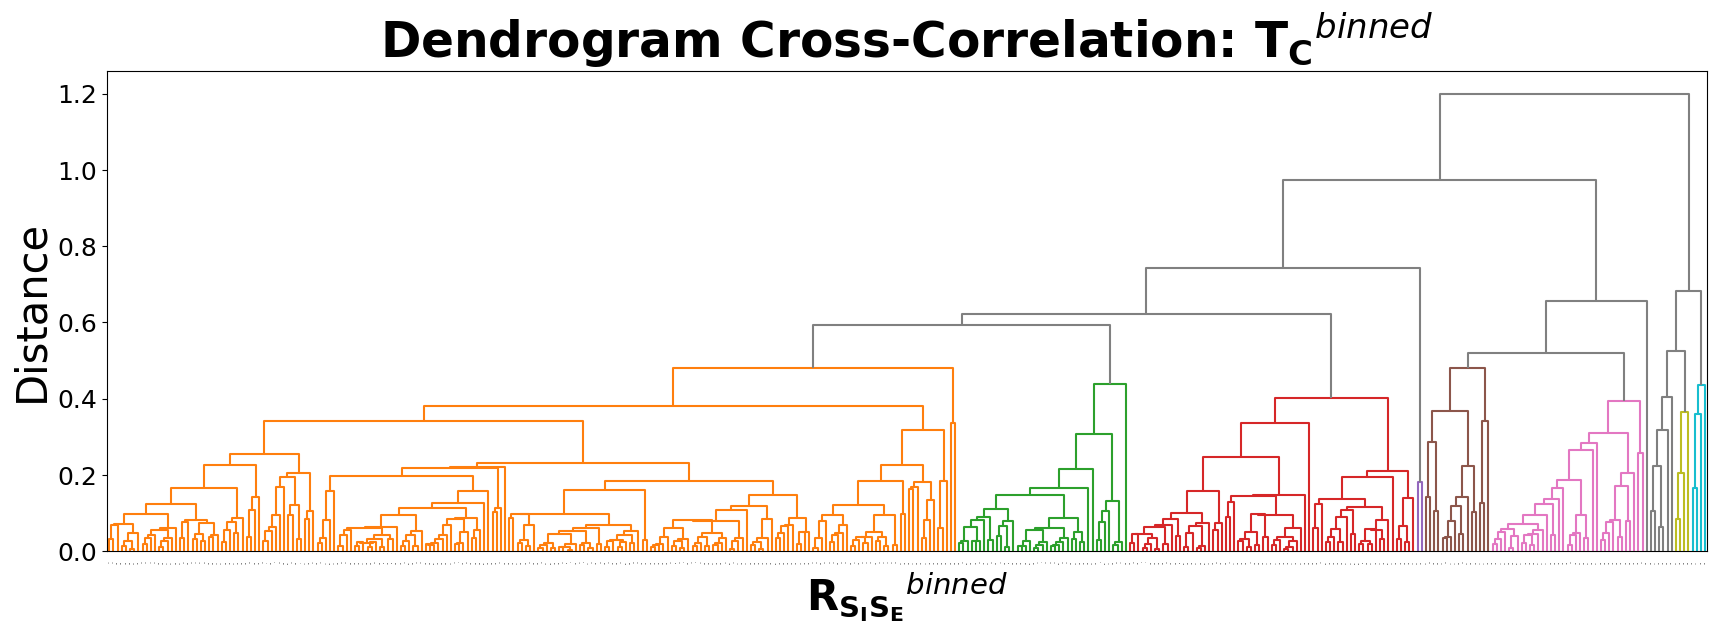

In [19]:
name_image_dendo = "cross/dendo_cross"
Z_cross,ordered_columns_cross,c_cross = perform_hierarchical_clustering_plot(z_scores,name_image_dendo)

'name_image_dendo = "cross/dendo_MI"\nZ_mi,ordered_columns_MI = perform_hierarchical_clustering(z_MI,name_image_dendo)\n'

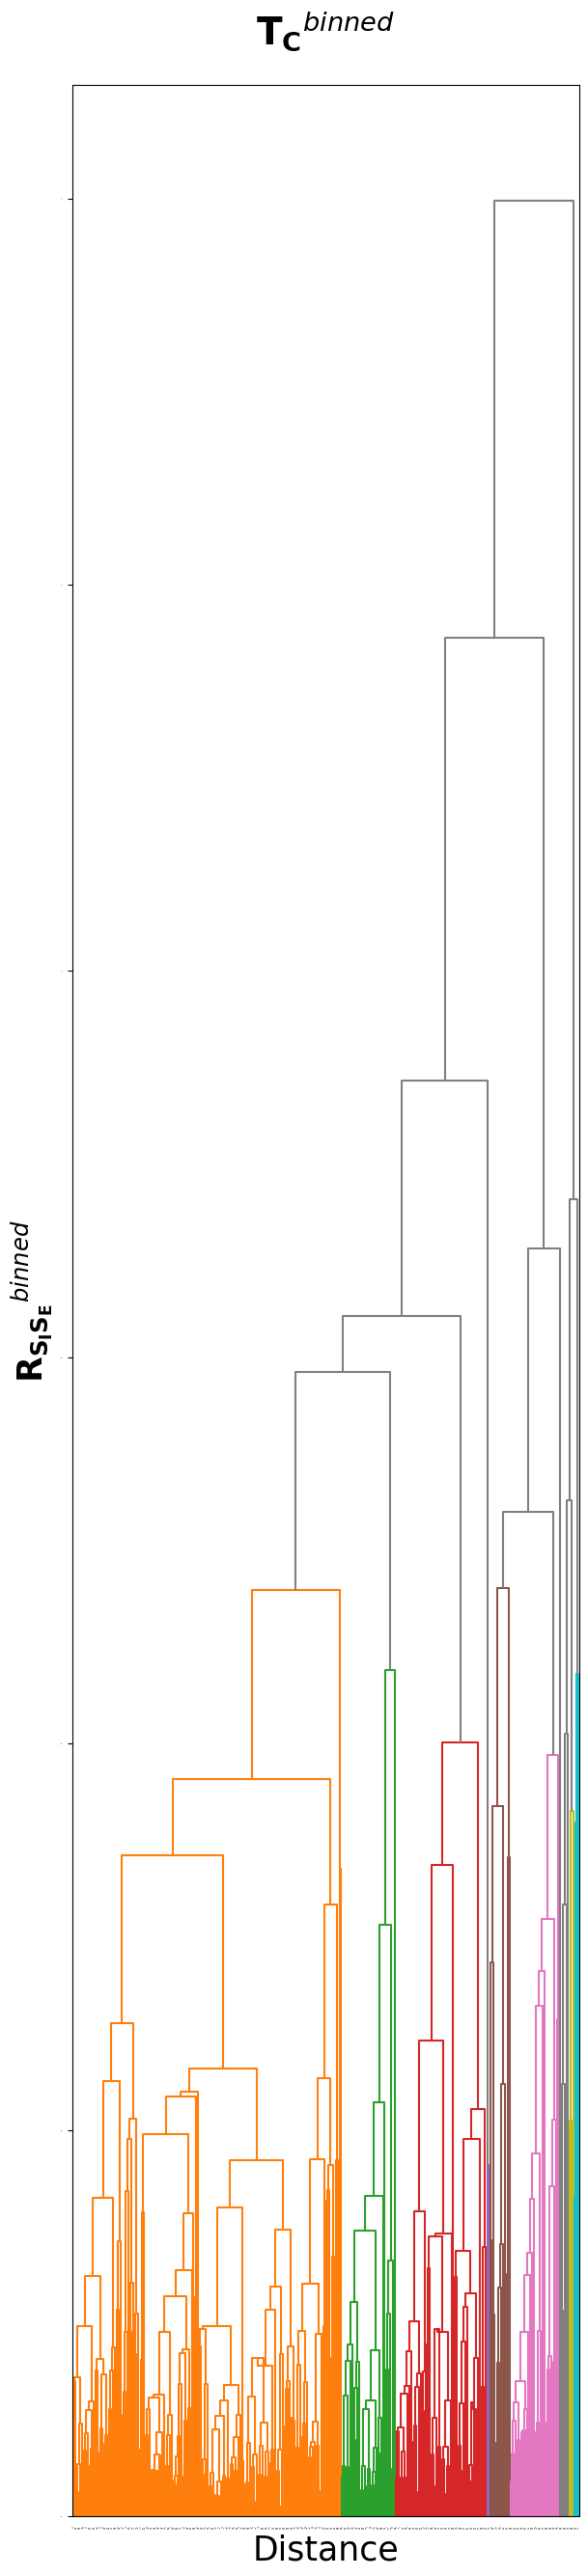

In [20]:

name_image_dendo = "cross/dendo_cross_right_binned"
Z_cross,ordered_columns_cross,cross_cluster_colors = perform_hierarchical_clustering_plot_left(z_scores,name_image_dendo)


"""name_image_dendo = "cross/dendo_MI"
Z_mi,ordered_columns_MI = perform_hierarchical_clustering(z_MI,name_image_dendo)
"""

In [21]:
import seaborn as sns 
def plot_cluster_corr(data, columns, name_sorte_cross, vmin, vmax, figsize=(4, 28), dpi=300):
    """
    Plots a heatmap for the time series data of specified columns in a DataFrame.

    Args:
    data (DataFrame): The DataFrame containing the time series data.
    columns (list): List of column names whose data is to be plotted.
    name_sorte_cross (str): The name for saving the heatmap image.
    vmin (float): The minimum value for the heatmap color scale.
    vmax (float): The maximum value for the heatmap color scale.
    figsize (tuple): The size of the figure.
    dpi (int): The resolution of the figure.

    Returns:
    None: Displays a heatmap of the time series.
    """

    # Extract the relevant columns and transpose for the heatmap
    cluster_data = data[columns].transpose()
    cmap = sns.color_palette("coolwarm", as_cmap=True)
    
    # Create the heatmap
    plt.figure(figsize=figsize, dpi=dpi)  # Adjust the figure size and resolution as needed
    ax = sns.heatmap(cluster_data, vmin=vmin, vmax=vmax, cmap=cmap, cbar=True)

    # Set font sizes
    plt.title(r'$\mathbf{R_{S_I S_E}}^{binned}$ Sorted by $\mathbf{T_{C}}$', fontweight='bold',fontsize=25,pad=30)
    plt.xlabel(r'Lag $\tau$',fontweight='bold', fontsize=28)
    #plt.ylabel(r'$\mathbf{R_{S_I S_E}}$ ', fontsize=28)
    # Customize x-axis ticks to range from -50 to 50
    x_labels = range(-4, 5)
    ax.set_xticks(range(0, len(x_labels)))
    ax.set_xticklabels(x_labels)

    ax.tick_params(axis='x', which='major', labelsize=5)
    ax.tick_params(axis='y', which='major', labelsize=23)
    
  
    # Customize y-axis ticks to show every 200th pair
    y_labels = cluster_data.index
    step = 70
    ax.set_yticks(range(0, len(y_labels), step))
    ax.set_yticklabels(y_labels[::step])
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=18)

    plt.tight_layout(pad=0)
    plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.05)# Adjust layout to fit everything nicely
    plt.savefig(f"images/{name_sorte_cross}.png", dpi=dpi, bbox_inches='tight')  # Save the figure with specified DPI
    plt.show()  # Display the figure

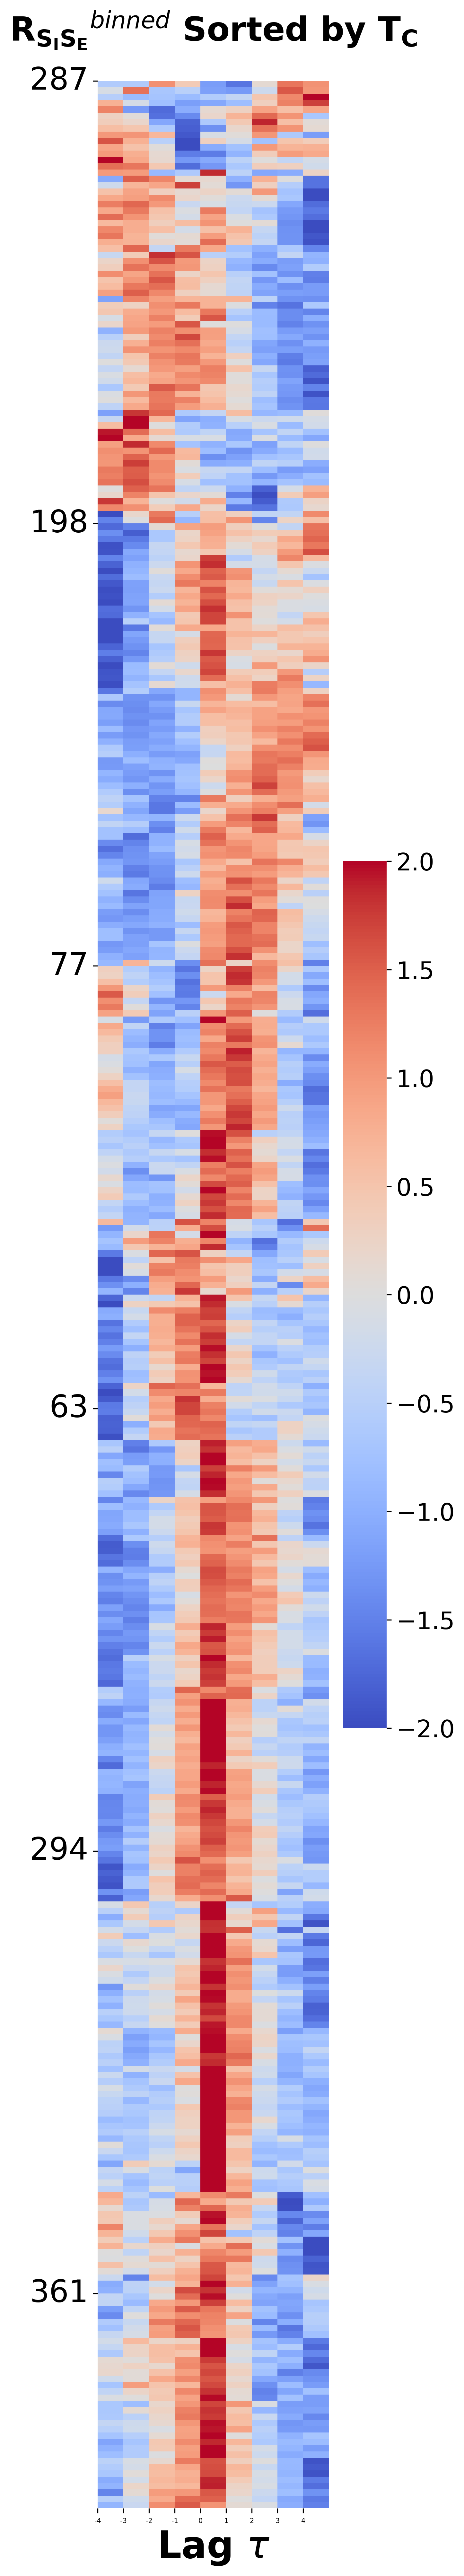

In [22]:
name_sorte_cross= "cross/sorted_cross_correlegrams_binned_CC"
plot_cluster_corr(z_scores,ordered_columns_cross,name_sorte_cross,vmin=-2,vmax=2)


In [24]:
ordered_columns_cross = list(ordered_columns_cross)

In [25]:
cross_corr_df

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,0.010815,0.237826,0.110872,0.000501,0.092582,0.176504,-0.250984,0.226399,-0.149266,-0.100942,...,-0.000063,-0.079705,0.021991,0.032751,0.066251,-0.066833,-0.046880,-0.013910,0.005487,-0.079188
1,-0.013288,0.152906,0.177438,0.034770,0.060869,-0.084108,-0.244105,0.168515,-0.164675,-0.163912,...,0.008933,-0.055099,0.059704,0.005293,0.086858,0.013159,-0.041347,0.030416,0.030531,-0.054543
2,0.022333,0.114677,0.350201,0.183654,0.082606,-0.252887,-0.105069,0.176171,-0.113276,-0.180813,...,0.057086,-0.049374,0.050085,0.023651,0.102254,0.059517,0.023068,0.080454,0.024287,-0.002920
3,0.055199,0.136916,0.518293,0.323001,0.120624,-0.249097,0.116836,0.277823,-0.028496,-0.073674,...,0.079969,-0.017816,0.084322,0.071344,0.138758,0.074370,0.026034,0.143792,0.053047,-0.011205
4,0.081143,0.278546,0.619860,0.557667,0.212536,0.061897,0.327629,0.423233,0.029589,0.200836,...,0.060262,0.001283,0.114917,0.079047,0.154008,0.079148,0.023879,0.157459,0.072785,-0.085976
5,0.069081,0.274125,0.470024,0.448173,0.158472,0.213392,0.318945,0.475558,-0.036462,0.279716,...,0.034556,-0.043245,0.085258,0.055636,0.138484,0.062049,0.002523,0.117424,0.032791,-0.088165
6,0.036834,0.228652,0.327488,0.349974,0.076908,0.188880,0.217712,0.442956,-0.081337,0.266176,...,-0.041976,-0.087830,0.072424,0.015724,0.124360,-0.035153,-0.031857,0.098059,0.023042,-0.110416
7,-0.048754,0.130227,0.235358,0.223838,0.024994,-0.039577,0.022443,0.353645,-0.110064,0.100896,...,-0.052449,-0.096813,0.068463,-0.043753,0.122750,-0.064307,0.003482,0.052749,0.003185,-0.081689
8,-0.120912,0.052748,0.243220,0.155853,0.027920,-0.202294,-0.051658,0.273705,-0.165431,-0.016459,...,-0.020096,-0.096268,0.091991,0.005063,0.116776,-0.017017,0.013515,0.050643,0.066873,-0.102159


## EXP ATTN

In [82]:
"""# REC 1  # TEST B

REC_INDEPENDENT_1_HEAD_ENC9_DEC9_COMBINED_ENC = pd.read_csv("data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_1_HEAD_ENC9_DEC9_COMBINED_ENC.csv")

# REC 2  # TEST B
REC_INDEPENDENT_1_HEAD_ENC9_DEC9_DEC =   pd.read_csv("data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_1_HEAD_ENC9_DEC9_DEC.csv")
REC_INDEPENDENT_1_HEAD_ENC9_DEC9_ENC =   pd.read_csv("data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_1_HEAD_ENC9_DEC9_ENC.csv")

# REC 3 # TEST DEC
REC_INDEPENDENT_1_HEAD_ENC104_DEC9_COMBINED_DEC =  pd.read_csv("data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_1_HEAD_ENC104_DEC9_COMBINED_DEC.csv")
REC_INDEPENDENT_1_HEAD_ENC104_DEC9_COMBINED_ENC =  pd.read_csv("data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_1_HEAD_ENC104_DEC9_COMBINED_ENC.csv")

# REC 4 # TEST DEC
REC_INDEPENDENT_4_HEAD_ENC9_DEC9_COMBINED_DEC =   pd.read_csv("data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_4_HEAD_ENC9_DEC9_COMBINED_DEC.csv")
REC_INDEPENDENT_4_HEAD_ENC9_DEC9_COMBINED_ENC =   pd.read_csv("data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_4_HEAD_ENC9_DEC9_COMBINED_ENC.csv")

# REC 5
REC_INDEPENDENT_4_HEAD_ENC9_DEC9_DEC =   pd.read_csv("data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_4_HEAD_ENC9_DEC9_DEC.csv")
REC_INDEPENDENT_4_HEAD_ENC9_DEC9_ENC =   pd.read_csv("data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_4_HEAD_ENC9_DEC9_ENC.csv")

#REC_INDEPENDENT_4_HEAD_ENC104_DEC9_DEC =  pd.read_csv("data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_4_HEAD_ENC104_DEC9_DEC.csv")"""

# REC 6  # TEST DEC
#REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_DEC =   pd.read_csv("data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_DEC.csv")
REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC =   pd.read_csv("data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC.csv")
REC_INDEPENDENT_1_HEAD_ENC9_DEC9_COMBINED_DEC = pd.read_csv("data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_1_HEAD_ENC9_DEC9_COMBINED_DEC.csv")
"""# REC 7
REC_INDEPENDENT_8_HEAD_ENC9_DEC9_ENC = pd.read_csv("data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_ENC.csv")
REC_INDEPENDENT_8_HEAD_ENC9_DEC9_DEC = pd.read_csv("data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_DEC.csv")"""

REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H1 =   pd.read_csv("data/DatasetClusters/fishes/fish02/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H1.csv")
REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H2 =   pd.read_csv("data/DatasetClusters/fishes/fish02/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H2.csv")
REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H3 =   pd.read_csv("data/DatasetClusters/fishes/fish02/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H3.csv")
REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H4 =   pd.read_csv("data/DatasetClusters/fishes/fish02/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H4.csv")

REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H5 =   pd.read_csv("data/DatasetClusters/fishes/fish02/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H5.csv")
REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H6 =   pd.read_csv("data/DatasetClusters/fishes/fish02/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H6.csv")
REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H7 =   pd.read_csv("data/DatasetClusters/fishes/fish02/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H7.csv")
REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H8 =   pd.read_csv("data/DatasetClusters/fishes/fish02/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H8.csv")

REC_INDEPENDENT_1_HEAD_ENC9_DEC9_COMBINED_ENC = pd.read_csv("data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_1_HEAD_ENC9_DEC9_COMBINED_ENC.csv")

In [83]:
import os

FOLDER_NAME = "TOPS/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC"


# Check if the folder exists
if not os.path.exists(FOLDER_NAME):
    # If it doesn't exist, create the folder
    os.makedirs(f'images/{FOLDER_NAME}')
    print(f"Folder '{FOLDER_NAME}' created.")
else:
    print(f"Folder '{FOLDER_NAME}' already exists.")

FileExistsError: [Errno 17] File exists: 'images/TOPS/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC'

In [241]:
REC_ACTIVE_1 = REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H1
REC_ACTIVE_2 = REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H2
REC_ACTIVE_3 = REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H3
REC_ACTIVE_4 = REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H4
REC_ACTIVE_5 = REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H5

REC_ACTIVE_6 = REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H6
REC_ACTIVE_7 = REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H7
REC_ACTIVE_8 = REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H8


In [242]:
REC_ACTIVE_1 = filter_scaler(REC_ACTIVE_1)
REC_ACTIVE_2 = filter_scaler(REC_ACTIVE_2)
REC_ACTIVE_3 = filter_scaler(REC_ACTIVE_3)
REC_ACTIVE_4 = filter_scaler(REC_ACTIVE_4)

REC_ACTIVE_5 = filter_scaler(REC_ACTIVE_5)
REC_ACTIVE_6 = filter_scaler(REC_ACTIVE_6)
REC_ACTIVE_7 = filter_scaler(REC_ACTIVE_7)
REC_ACTIVE_8 = filter_scaler(REC_ACTIVE_8)

In [243]:
RECS = [REC_ACTIVE_1,REC_ACTIVE_2,REC_ACTIVE_3,REC_ACTIVE_4,REC_ACTIVE_5,REC_ACTIVE_6,REC_ACTIVE_7,REC_ACTIVE_8]

In [179]:
REC_ACTIVE.reset_index(drop=True)

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,0.123499,0.118814,0.127344,0.131048,0.125487,0.131982,0.126128,0.124844,0.125400,0.127863,...,0.126867,0.119708,0.119679,0.124856,0.120486,0.119797,0.122781,0.129100,0.110544,0.127714
1,0.122567,0.122193,0.126876,0.121814,0.123409,0.126174,0.121672,0.124747,0.124157,0.123842,...,0.126165,0.127140,0.128254,0.121443,0.125987,0.119470,0.130445,0.127196,0.127588,0.122792
2,0.121739,0.121999,0.117273,0.130481,0.126731,0.127909,0.121284,0.126181,0.130004,0.127855,...,0.129617,0.119639,0.122463,0.126739,0.128191,0.123116,0.121640,0.124001,0.122664,0.131973
3,0.119805,0.126220,0.130781,0.123215,0.123838,0.122408,0.117782,0.125896,0.124469,0.121384,...,0.119382,0.132796,0.134699,0.121802,0.124209,0.125004,0.121387,0.120958,0.125936,0.122034
4,0.133179,0.132269,0.127561,0.121896,0.122887,0.112589,0.125353,0.128835,0.121437,0.130566,...,0.137142,0.130947,0.132218,0.125921,0.129443,0.132434,0.129510,0.126721,0.128770,0.131246
5,0.123141,0.126400,0.119077,0.118993,0.129454,0.124981,0.129233,0.125829,0.123535,0.124107,...,0.120307,0.120313,0.120624,0.120334,0.126525,0.121577,0.125752,0.121108,0.117741,0.120531
6,0.125548,0.128610,0.127243,0.122277,0.117842,0.127437,0.128802,0.121890,0.130411,0.123182,...,0.115152,0.117681,0.117332,0.131408,0.123413,0.115499,0.121229,0.128164,0.127379,0.120919
7,0.124486,0.127436,0.121432,0.127336,0.126558,0.127591,0.134848,0.121415,0.120821,0.128753,...,0.118317,0.121419,0.124581,0.126095,0.124833,0.133317,0.125905,0.121502,0.124265,0.120923
8,0.120273,0.127067,0.123992,0.131299,0.126591,0.128600,0.122798,0.121345,0.126468,0.124120,...,0.124973,0.130255,0.125031,0.129490,0.131753,0.118664,0.123589,0.121792,0.130238,0.129487


In [244]:
# Initialize the Min-Max Scaler
scaler = MinMaxScaler()
sc = RobustScaler()
scaler2 = StandardScaler()
q = QuantileTransformer(n_quantiles=9)
# Fit the scaler to the data and transform it


for i in range(len(RECS)):
    REC_ACTIVE = RECS[i]
    REC_ACTIVE = scale_attns(REC_ACTIVE,scaler)
    REC_ACTIVE = fix_sign(REC_ACTIVE.reset_index(drop=True),cross_corr_df)
    #REC_ACTIVE = scale_attns(REC_ACTIVE,q)

    REC_ACTIVE = standardize_cross_correlation(REC_ACTIVE.copy())
    
    RECS[i] = REC_ACTIVE


In [245]:
#cross_corr_df = scale_attns(cross_corr_df,scaler)
#cross_corr_df = scale_attns(cross_corr_df,q)

#REC_INDEPENDENT_1_HEAD_ENC9_DEC9_COMBINED_DEC = fix_sign(REC_INDEPENDENT_1_HEAD_ENC9_DEC9_COMBINED_DEC.reset_index(drop=True),cross_corr_df)
REC_ACTIVE = RECS[0]

for i in RECS:
    REC_ACTIVE += i

In [246]:
REC_ACTIVE= REC_ACTIVE / 8

In [247]:
#a_new_mask_cross_1d_spar_104 = pd.DataFrame(sc.fit_transform(a_no_time_cross_cross_raw_8_head), columns=a_no_time_cross_cross_raw_8_head.columns)
#a_cross_cross_no_gate_104_dec_9 = standardize_cross_correlation(a_4_head_cross_1_cross_dec_cross_enc9_dec9_ENC)
REC_ACTIVE

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,0.751511,-0.487350,0.250548,0.079617,0.099706,1.360481,-1.271536,0.212278,-0.452140,-1.321362,...,-1.220685,-0.238274,-0.326247,0.830015,-0.373558,-0.963392,-1.080127,-2.116376,-0.454115,0.074661
1,-1.330697,-0.517393,-0.221416,-0.472620,0.517992,-1.094331,-0.979903,-0.331454,-0.332845,-0.549781,...,0.791181,-0.118030,-0.383214,0.195910,0.024811,0.685283,-1.468071,-0.058656,0.173732,0.102604
2,0.787314,0.263365,0.839413,-0.489037,0.013806,-1.048986,-1.048685,0.680538,-0.610285,-0.725606,...,0.997099,-0.394601,0.140946,0.347603,-0.003733,0.385424,0.538649,0.395055,-0.179693,-0.735179
3,0.208782,-0.383847,-0.694824,0.739433,0.116938,-0.396221,0.577071,0.472808,-0.318891,-1.018385,...,1.088416,-0.325583,0.709705,-0.224233,-0.271945,0.994836,0.511037,0.540983,0.579748,0.704483
4,1.202498,0.927254,0.518306,0.696010,0.143847,1.085248,0.690503,0.101844,2.350630,0.989174,...,0.878224,2.257307,0.062060,0.029120,0.611954,1.355253,1.184155,0.667208,0.587982,-0.723962
5,0.091679,0.700605,0.213518,-0.394765,0.600284,1.249966,0.940317,-0.218883,-0.768860,1.142619,...,0.714356,-0.340551,-0.551484,0.440476,-0.566697,0.892413,0.972761,0.299794,-0.247955,0.670164
6,0.871352,-0.655443,-0.184891,-0.867170,-0.792540,0.769182,1.434891,-0.429151,-0.384375,1.270382,...,-1.082873,-0.438823,-0.312067,0.214896,-0.058963,-0.899542,-1.422469,0.783356,0.245905,-0.179333
7,-1.035440,0.220970,-0.277351,0.744063,-0.194258,-0.914815,0.804734,-0.101908,0.466473,0.903957,...,-1.259784,-0.219997,0.350330,-2.029303,0.453667,-1.474420,0.726165,-0.185890,-0.348964,0.310590
8,-1.546999,-0.068161,-0.443303,-0.035532,-0.505777,-1.010524,-1.147391,-0.386072,0.050292,-0.690999,...,-0.905934,-0.181448,0.309972,0.195515,0.184464,-0.975854,0.037899,-0.325473,-0.356642,-0.224027


## Maps

In [222]:
REC_ACTIVE

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,0.803733,-0.487350,0.250548,0.079617,0.099706,1.278457,-1.267903,0.212278,-0.413115,-1.037761,...,-1.264677,-0.393708,-0.326247,0.436010,-0.373558,-1.249214,-1.575527,-3.178933,-0.454115,0.074661
1,-1.582590,-0.517393,-0.221416,-0.472620,0.517992,-1.026225,-1.247527,-0.331454,-0.393619,-0.982081,...,1.001791,-0.383369,-0.383214,0.402623,0.024811,0.985901,-1.585759,0.375455,0.173732,0.102604
2,0.809900,0.263365,0.839413,-0.489037,0.013806,-1.025733,-1.257270,0.680538,-0.426164,-0.991271,...,1.008420,-0.403958,0.140946,0.401621,-0.003733,0.968400,0.789620,0.405787,-0.179693,-0.735179
3,0.758503,-0.383847,-0.694824,0.739433,0.116938,-0.959183,0.982578,0.472808,-0.390662,-1.018374,...,1.023102,-0.396783,0.709705,0.358684,-0.271945,1.017045,0.801681,0.414238,0.579748,0.704483
4,0.840108,0.927254,0.518306,0.696010,0.143847,1.249508,0.994519,0.101844,3.176351,1.245436,...,1.000245,3.176836,0.062060,0.373236,0.611954,1.044511,0.830208,0.418774,0.587982,-0.723962
5,0.745120,0.700605,0.213518,-0.394765,0.600284,1.266275,1.011805,-0.218883,-0.454314,1.263334,...,0.994394,-0.396416,-0.551484,0.418959,-0.566697,1.011150,0.808990,0.401516,-0.247955,0.670164
6,0.810967,-0.655443,-0.184891,-0.867170,-0.792540,1.232935,1.041977,-0.429151,-0.404188,1.276736,...,-1.249666,-0.418101,-0.312067,0.393089,-0.058963,-1.245906,-1.606399,0.427473,0.245905,-0.179333
7,-1.572849,0.220970,-0.277351,0.744063,-0.194258,-1.011421,0.997669,-0.101908,-0.328462,1.242033,...,-1.266888,-0.398123,0.350330,-3.176899,0.453667,-1.285708,0.803725,0.367406,-0.348964,0.310590
8,-1.612891,-0.068161,-0.443303,-0.035532,-0.505777,-1.004613,-1.255849,-0.386072,-0.365825,-0.998051,...,-1.246722,-0.386379,0.309972,0.392677,0.184464,-1.246180,0.733460,0.368284,-0.356642,-0.224027


In [248]:
def perform_hierarchical_clustering_plot_attn(z_scores_df,name_image_dendo):
    # Transpose the DataFrame to make columns correspond to features
    data_transposed = z_scores_df.transpose()

    # Calculate the pairwise correlation distance matrix
    Y = pdist(data_transposed, 'correlation')

    # Perform hierarchical clustering using centroid linkage
    Z = linkage(Y, method='centroid')

    # Create a larger dendrogram to visualize the clustering
    fig, ax = plt.subplots(figsize=(7, 28))
    dendro_attn= dendrogram(
        Z,
        orientation='left',
        labels=data_transposed.index,
        leaf_font_size=1,
        distance_sort='descending',
        above_threshold_color='grey',
        color_threshold=0.6,
        leaf_rotation=90,
        show_leaf_counts=True,
        ax=ax
    )

    
    cluster_colors_attn = {}
    for i, color in zip(dendro_attn['ivl'], dendro_attn['leaves_color_list']):
        cluster_colors_attn[i] = color

    ax.set_title(r'REC 6(CDS-Encoder): $\mathbf{T_{A}}$', fontsize=28, pad=30, fontweight='bold')
    ax.set_ylabel(r'$\mathbf{A_{S_I S_E}}^{adjusted}$', fontsize=25)
    ax.set_xlabel('Distance', fontsize=25)
    plt.yticks(fontsize=1)
    #ax.set_xticks(fontsize=12)
    plt.tight_layout(pad=0)  # Remove padding
    plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.05)  # Adjust layout to fit everything nicely
    plt.savefig(f"images/{name_image_dendo}.png", dpi=500, bbox_inches='tight')

    leaf_order = leaves_list(Z)
    ordered_columns = data_transposed.index[leaf_order]
    return Z, ordered_columns, cluster_colors_attn

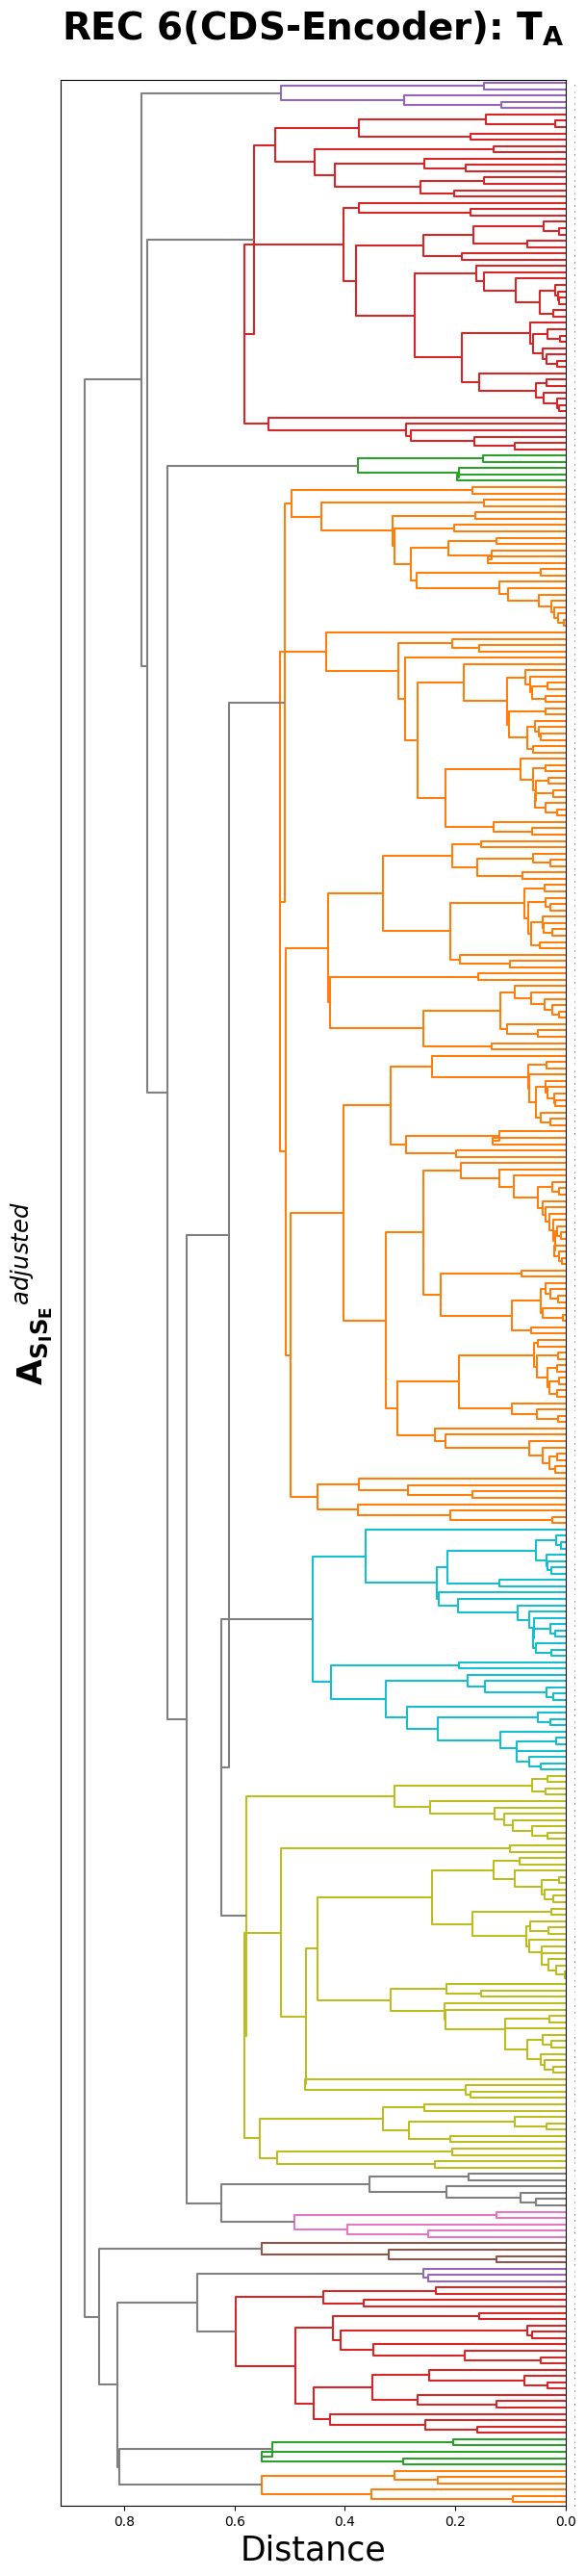

In [249]:
dendo_attn = f"{FOLDER_NAME}/dendo_REC_6_SPEC2" 
Z_attn,sorted_columns_attn , cluster_colors_attn = perform_hierarchical_clustering_plot_attn(REC_ACTIVE,dendo_attn)

In [160]:
import seaborn as sns 
def plot_cluster_exp_attn(data, columns,name):
    """
    Plots a heatmap for the time series data of specified columns in a DataFrame.

    Args:
    data (DataFrame): The DataFrame containing the time series data.
    columns (list): List of column names whose data is to be plotted.

    Returns:
    None: Displays a heatmap of the time series.
    """


    l = generate_patch_list(5)
    #l = reversed_list = l[::-1]
    
    # Extract the relevant columns and transpose for the heatmap
    cluster_data = data[columns].transpose()
    cmap = sns.color_palette("coolwarm", as_cmap=True)
    
    # Create the heatmap
    plt.figure(figsize=(20, len(columns) / 2))  # Adjust the figure size as needed
    sns.heatmap(cluster_data, cmap=cmap,cbar=True,vmin=-1.5, vmax=1.5,xticklabels=l)
    plt.title('Heatmap of Time Series in Cluster 35')
    plt.xlabel('Time Steps')
    plt.ylabel('Series in Cluster 35')
    plt.savefig(f"images/{name}.png")

In [250]:
def plot_cluster_att(data, columns, name_sorte_cross, vmin=-2, vmax=2, figsize=(4, 28), dpi=300):
    """
    Plots a heatmap for the time series data of specified columns in a DataFrame.

    Args:
    data (DataFrame): The DataFrame containing the time series data.
    columns (list): List of column names whose data is to be plotted.
    name_sorte_cross (str): The name for saving the heatmap image.
    vmin (float): The minimum value for the heatmap color scale.
    vmax (float): The maximum value for the heatmap color scale.
    figsize (tuple): The size of the figure.
    dpi (int): The resolution of the figure.

    Returns:
    None: Displays a heatmap of the time series.
    """
    # Extract the relevant columns and transpose for the heatmap
    cluster_data = data[columns].transpose()
    cmap = sns.color_palette("coolwarm", as_cmap=True)
    
    # Create the heatmap
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    sns.heatmap(cluster_data, vmin=vmin, vmax=vmax, cmap=cmap, cbar=True, ax=ax)

    # Set font sizes
    plt.title(r'Sorted $\mathbf{A_{S_I S_E}}^{adjusted}$', fontweight='bold',fontsize=25,pad=30)
    plt.xlabel(r'Segment Aligment $\bar{a_{i}}$',fontweight='bold', fontsize=23)
    #plt.ylabel(r'$\mathbf{R_{S_I S_E}}$ ', fontsize=28)
    # Customize x-axis ticks to range from -50 to 50
    x_labels = range(-4,5)
    ax.set_xticks(range(0, len(x_labels)))
    ax.set_xticklabels(x_labels)

    ax.tick_params(axis='x', which='major', labelsize=5)
    ax.tick_params(axis='y', which='major', labelsize=23)
    
  
   # Customize y-axis ticks to show every 200th pair
    y_labels = cluster_data.index
    step = 70
    ax.set_yticks(range(0, len(y_labels), step))
    ax.set_yticklabels(y_labels[::step])
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=18)

    plt.tight_layout(pad=0)
    plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.05)# Adjust layout to fit everything nicely
    plt.savefig(f"images/{name_sorte_cross}.png", dpi=dpi,bbox_inches='tight')  # Save the figure with specified DPI
    plt.show()  # Display the figure

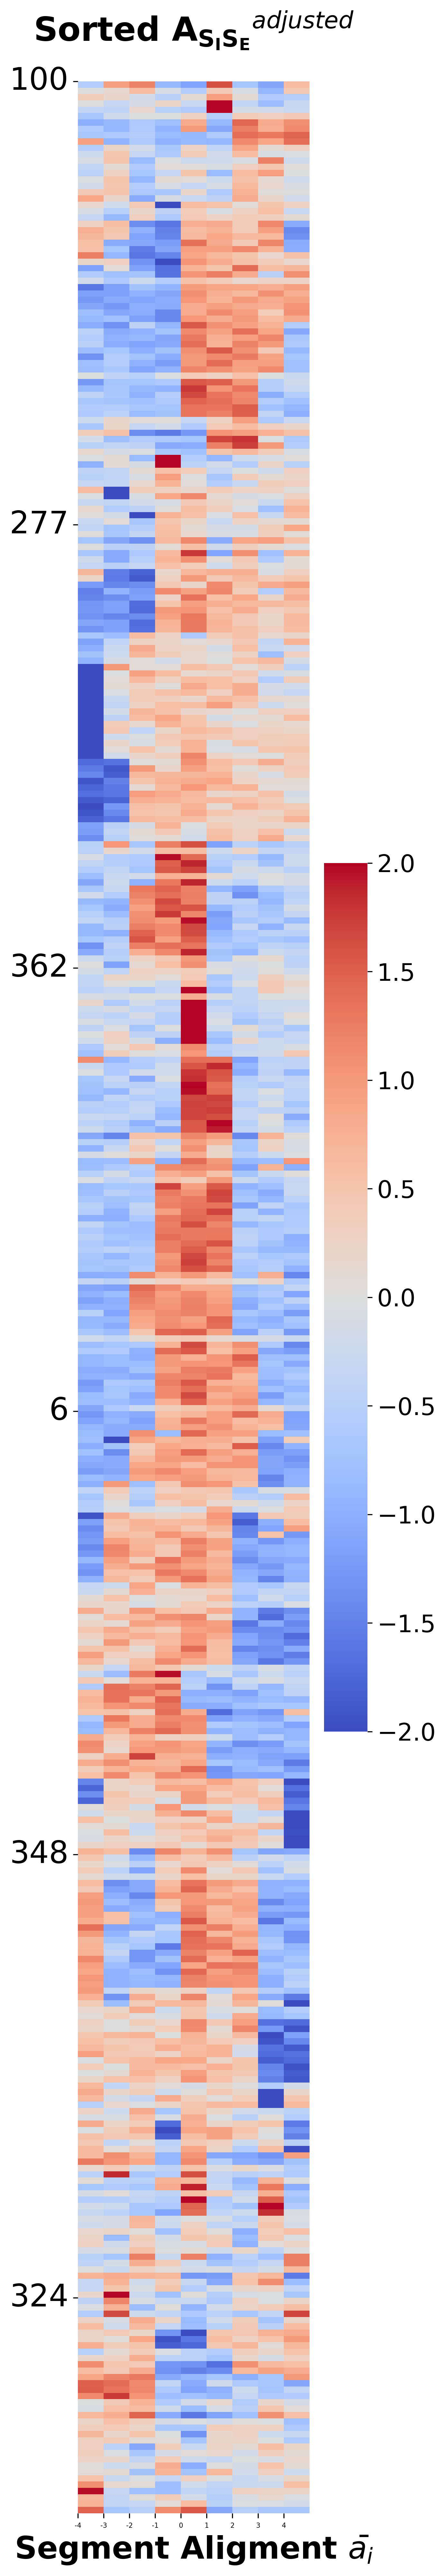

In [252]:
name_sorte_attn= f"{FOLDER_NAME}/sorted_attn_REC_6_SPEC2"    
plot_cluster_att(REC_ACTIVE,sorted_columns_attn,name_sorte_attn)

### HEAT

In [284]:

heat_scores_df_a_base= pd.read_csv("data/DatasetClusters/fishes/fish02/attn_scores_df_Masked_4.csv")
heat_scores_df_a_base

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,2.880026,1.546108,2.250428,2.673084,3.949965,2.176079,1.653263,2.599995,2.539628,1.576085,...,2.663864,1.800471,3.330717,1.245247,0.938104,2.644126,0.494413,0.644137,2.893069,3.210382
1,1.564419,2.898336,2.194016,2.156132,0.494479,2.268365,2.791182,1.546514,2.325345,1.304271,...,0.236228,2.643973,1.113728,0.572995,3.576770,0.795234,3.806820,2.732397,1.309650,1.174087
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
435,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
436,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
437,1.602083,1.926651,2.478774,1.587604,2.133320,2.991133,2.178636,1.956572,2.625743,2.433526,...,2.302634,1.378035,2.027587,0.659657,1.866524,2.569072,2.003857,1.281785,1.817103,2.658536


In [212]:

FOLDER_NAME_HEAT = "attn_scores_df_Masked_4"

In [213]:
# Check if the folder exists
if not os.path.exists(FOLDER_NAME_HEAT):
    # If it doesn't exist, create the folder
    os.makedirs(f'images/{FOLDER_NAME_HEAT}')
    print(f"Folder '{FOLDER_NAME_HEAT}' created.")
else:
    print(f"Folder '{FOLDER_NAME_HEAT}' already exists.")

FileExistsError: [Errno 17] File exists: 'images/attn_scores_df_Masked_4'

In [ ]:
#eat_scores_df_a_base = process_data_window(heat_scores_df_a_base)


In [ ]:
name_dendo_heat_attn= f"{FOLDER_NAME_HEAT}/dendo_attn_heat"
Z_heat,ordered_columns_heat = perform_hierarchical_clusterin_heat(heat_scores_df_a_base,name_dendo_heat_attn)

In [ ]:
name_heat_attn= f"{FOLDER_NAME_HEAT}/sorted_heat"
plot_cluster_heat(heat_scores_df_a_base,ordered_columns_heat,name_heat_attn)

## Different index

In [253]:
def plot_cluster_corr(data, columns, name_sorte_cross, vmin, vmax, figsize=(4, 28), dpi=300):
    """
    Plots a heatmap for the time series data of specified columns in a DataFrame.

    Args:
    data (DataFrame): The DataFrame containing the time series data.
    columns (list): List of column names whose data is to be plotted.
    name_sorte_cross (str): The name for saving the heatmap image.
    vmin (float): The minimum value for the heatmap color scale.
    vmax (float): The maximum value for the heatmap color scale.
    figsize (tuple): The size of the figure.
    dpi (int): The resolution of the figure.

    Returns:
    None: Displays a heatmap of the time series.
    """

    # Extract the relevant columns and transpose for the heatmap
    cluster_data = data[columns].transpose()
    cmap = sns.color_palette("coolwarm", as_cmap=True)
    
    # Create the heatmap
    plt.figure(figsize=figsize, dpi=dpi)  # Adjust the figure size and resolution as needed
    ax = sns.heatmap(cluster_data, vmin=vmin, vmax=vmax, cmap=cmap, cbar=True)

    # Set font sizes
    plt.title(r'$\mathbf{R_{S_I S_E}}^{binned}$ Sorted by $\mathbf{T_{A}^{Head 8}}$', fontweight='bold',fontsize=25,pad=30)
    plt.xlabel(r'Lag $\tau$',fontweight='bold', fontsize=28)
    #plt.ylabel(r'$\mathbf{R_{S_I S_E}}$ ', fontsize=28)
    # Customize x-axis ticks to range from -50 to 50
    x_labels = range(-4, 5)
    ax.set_xticks(range(0, len(x_labels)))
    ax.set_xticklabels(x_labels)

    ax.tick_params(axis='x', which='major', labelsize=5)
    ax.tick_params(axis='y', which='major', labelsize=23)
    
  
    # Customize y-axis ticks to show every 200th pair
    y_labels = cluster_data.index
    step = 70
    ax.set_yticks(range(0, len(y_labels), step))
    ax.set_yticklabels(y_labels[::step])
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=18)

    plt.tight_layout(pad=0)
    plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.05)# Adjust layout to fit everything nicely
    plt.savefig(f"images/{name_sorte_cross}.png", dpi=dpi, bbox_inches='tight')  # Save the figure with specified DPI
    plt.show()  # Display the figure

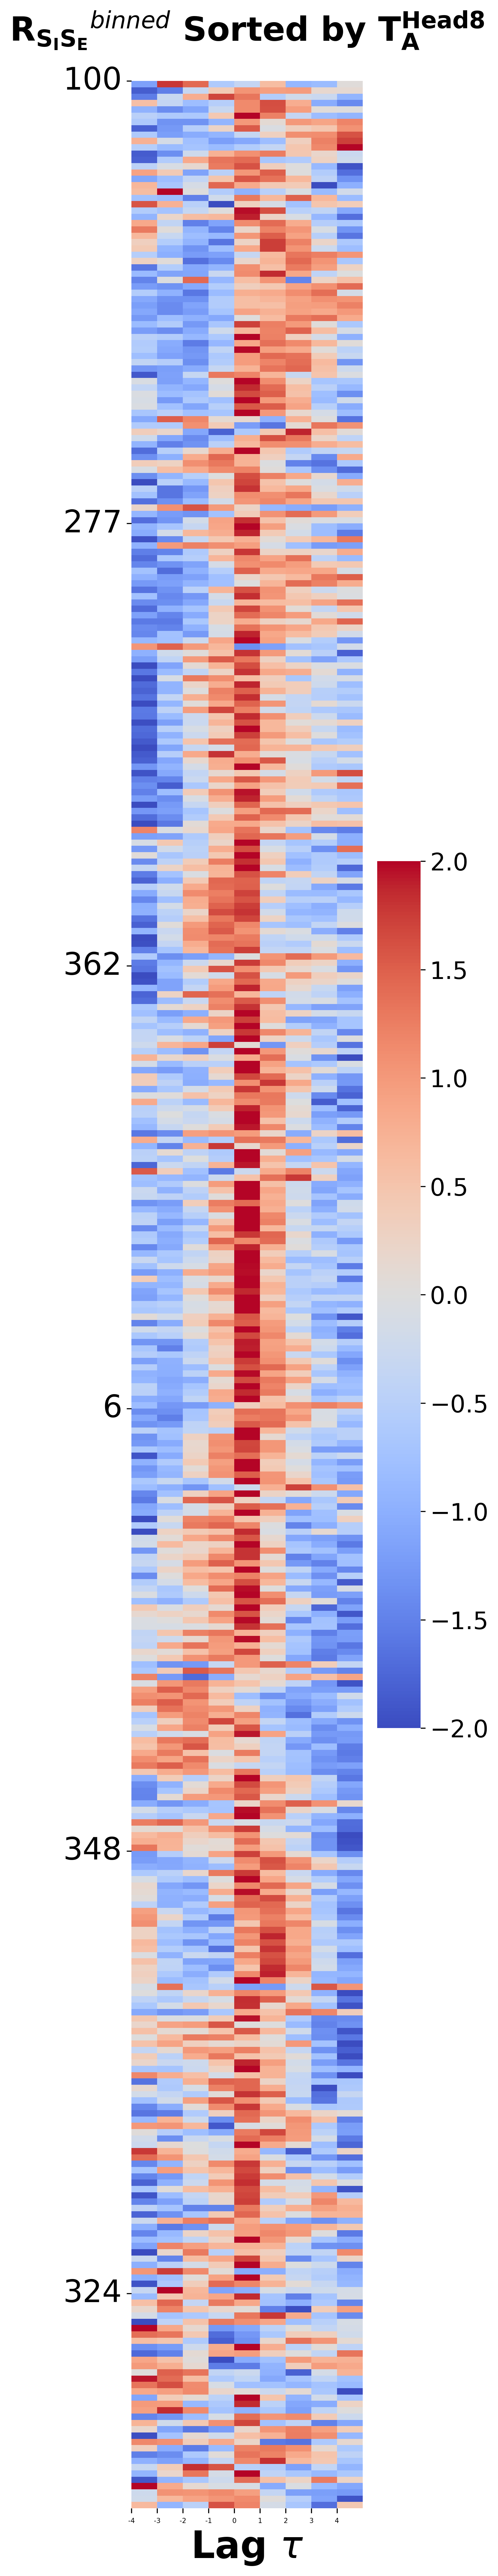

In [255]:
name_sorte_cross= f"{FOLDER_NAME}/cross_sorted_by_attn_REC_SPEC2"
sorted_columns_attn_ind = [int(i) for i in sorted_columns_attn]

plot_cluster_corr(z_scores,sorted_columns_attn_ind,name_sorte_cross,vmin=-2,vmax=2)

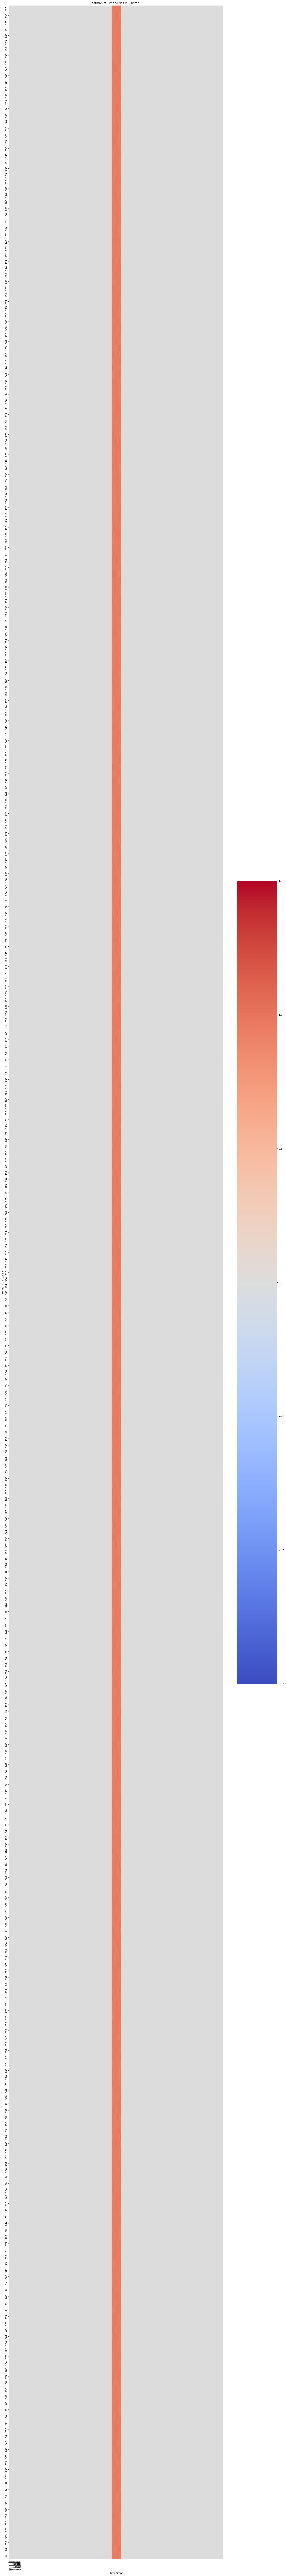

In [ ]:
name_sorte_cross=  f"{FOLDER_NAME}/attn_sorted_by_cross_stand2"
sorted_columns_cross_ind = [str(i) for i in ordered_columns_cross]

plot_cluster_exp_attn(REC_INDEPENDENT_8_HEAD_ENC9_DEC9_DEC,sorted_columns_cross_ind,name_sorte_cross)

In [ ]:
name_sorte_MI=  f"{FOLDER_NAME}/attn_sorted_by_MI"
sorted_columns_MI_ind = [str(i) for i in ordered_columns_MI]

plot_cluster_exp_attn(REC_INDEPENDENT_8_HEAD_ENC9_DEC9_DEC,sorted_columns_MI_ind,name_sorte_MI)

In [ ]:
name_sorte_MI= f"{FOLDER_NAME}/MI_sorted_by_attn_stand2"
sorted_columns_attn_ind = [int(i) for i in sorted_columns_attn]

plot_cluster_corr(z_MI,sorted_columns_attn_ind,name_sorte_MI)

In [ ]:
name_sorte_cross= f"{FOLDER_NAME_HEAT}/cross_sorted_by_attn_sorted_heat_attn_WIN"

sorted_columns_heat_ind = [int(i) for i in ordered_columns_heat]
plot_cluster_corr(z_scores,sorted_columns_heat_ind,name_sorte_cross)

## Clusters analysis

In [ ]:


def plot_clusters(Z,labels, cut_method='maxclust', cut_value=5):
    """
    Plots the clusters from a hierarchical clustering given a linkage matrix Z.
    
    Parameters:
    - Z: Linkage matrix from hierarchical clustering.
    - cut_method: Method to cut the dendrogram ('maxclust' for maximum clusters or 'distance' for maximum distance).
    - cut_value: Value to cut the dendrogram. Number of clusters if cut_method is 'maxclust' or distance if 'distance'.
    """
    
    # Determine clusters from the linkage matrix
    if cut_method == 'maxclust':
        clusters = fcluster(Z, t=cut_value, criterion='maxclust')
    elif cut_method == 'distance':
        clusters = fcluster(Z, t=cut_value, criterion='distance')
    else:
        raise ValueError("Invalid cut method. Use 'maxclust' or 'distance'.")
    
    # Number of unique clusters
    num_clusters = len(np.unique(clusters))
    print(f"Total number of clusters: {num_clusters}")

    # Create a scatter plot with a high contrast colormap
    plt.figure(figsize=(40, 10))
    colors = plt.get_cmap('tab20b')(np.linspace(0, 1, num_clusters))
    cmap = ListedColormap(colors)

    for i, cluster in enumerate(np.unique(clusters)):
        # Get indices for data points in the current cluster
        idx = np.where(clusters == cluster)[0]
        # Create a small spread in y-values within the same cluster
        y_values = np.random.normal(i / 10, 0.01, size=len(idx))
        plt.scatter(labels[idx], y_values, color=colors[i % 20], label=f'Cluster {cluster}', s=50)

    plt.title('Cluster Distribution with Label Spread and High Contrast')
    plt.xlabel('Original Label Index')
    plt.ylabel('Random Offset within Cluster')
    plt.legend(title="Cluster Number", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()
    
    return clusters

Total number of clusters: 10


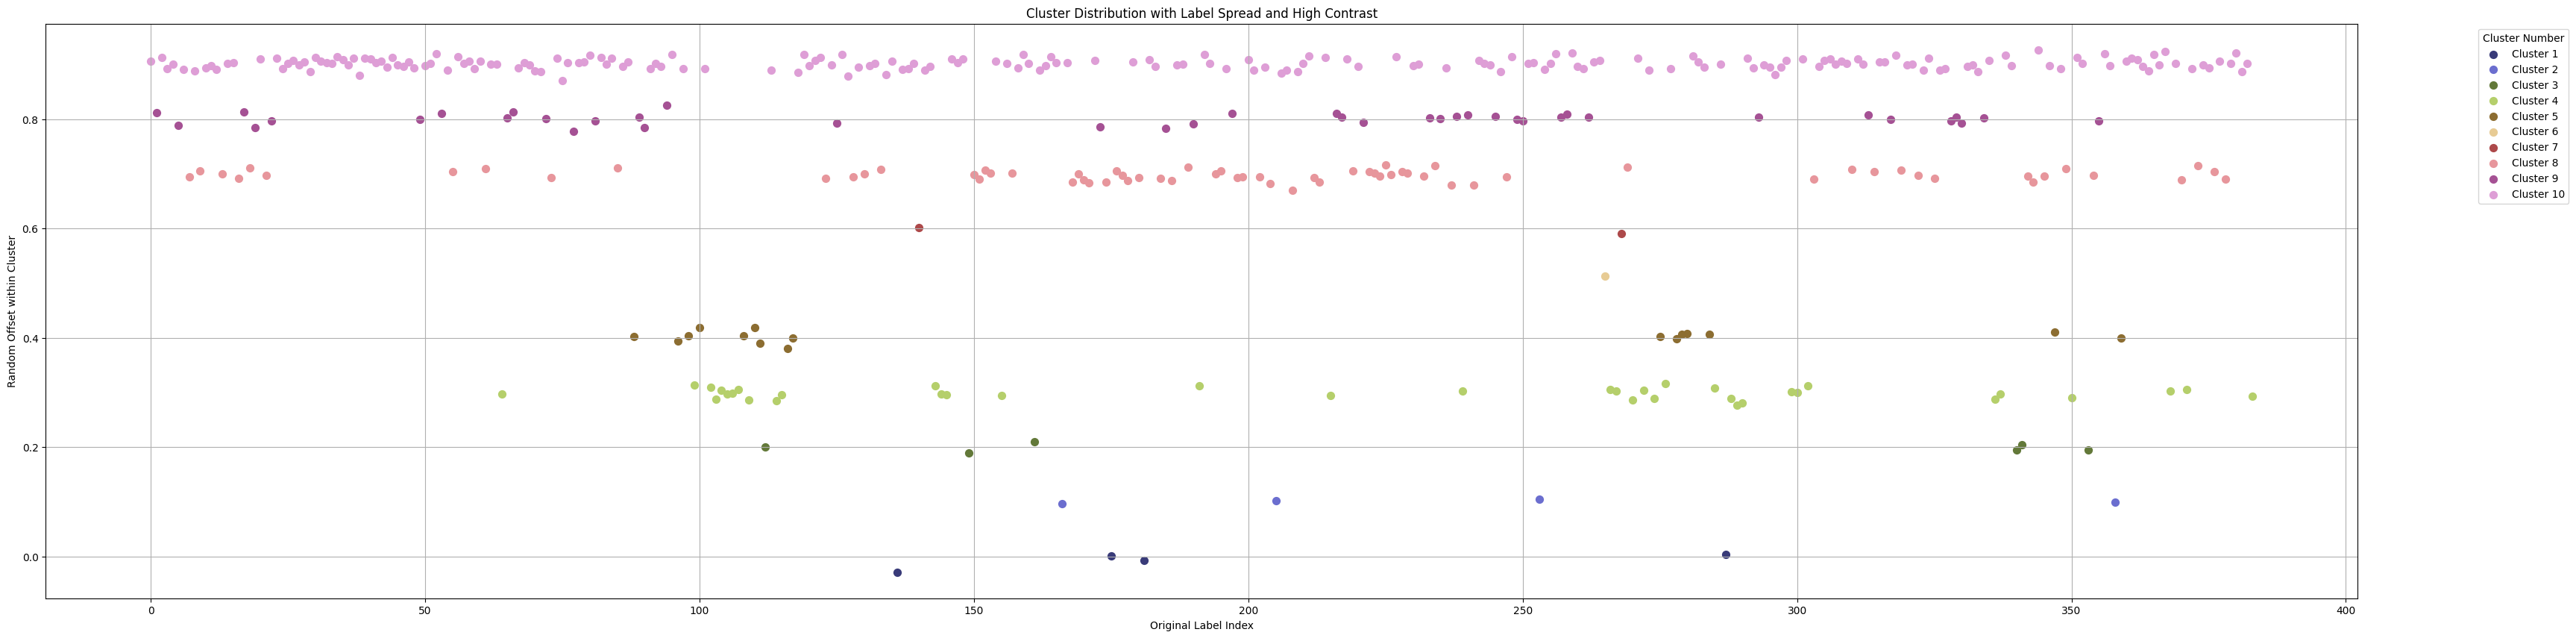

In [232]:

clusters_cross = plot_clusters(Z_cross,  np.arange(384) ,cut_method='distance', cut_value=0.5)

Total number of clusters: 14


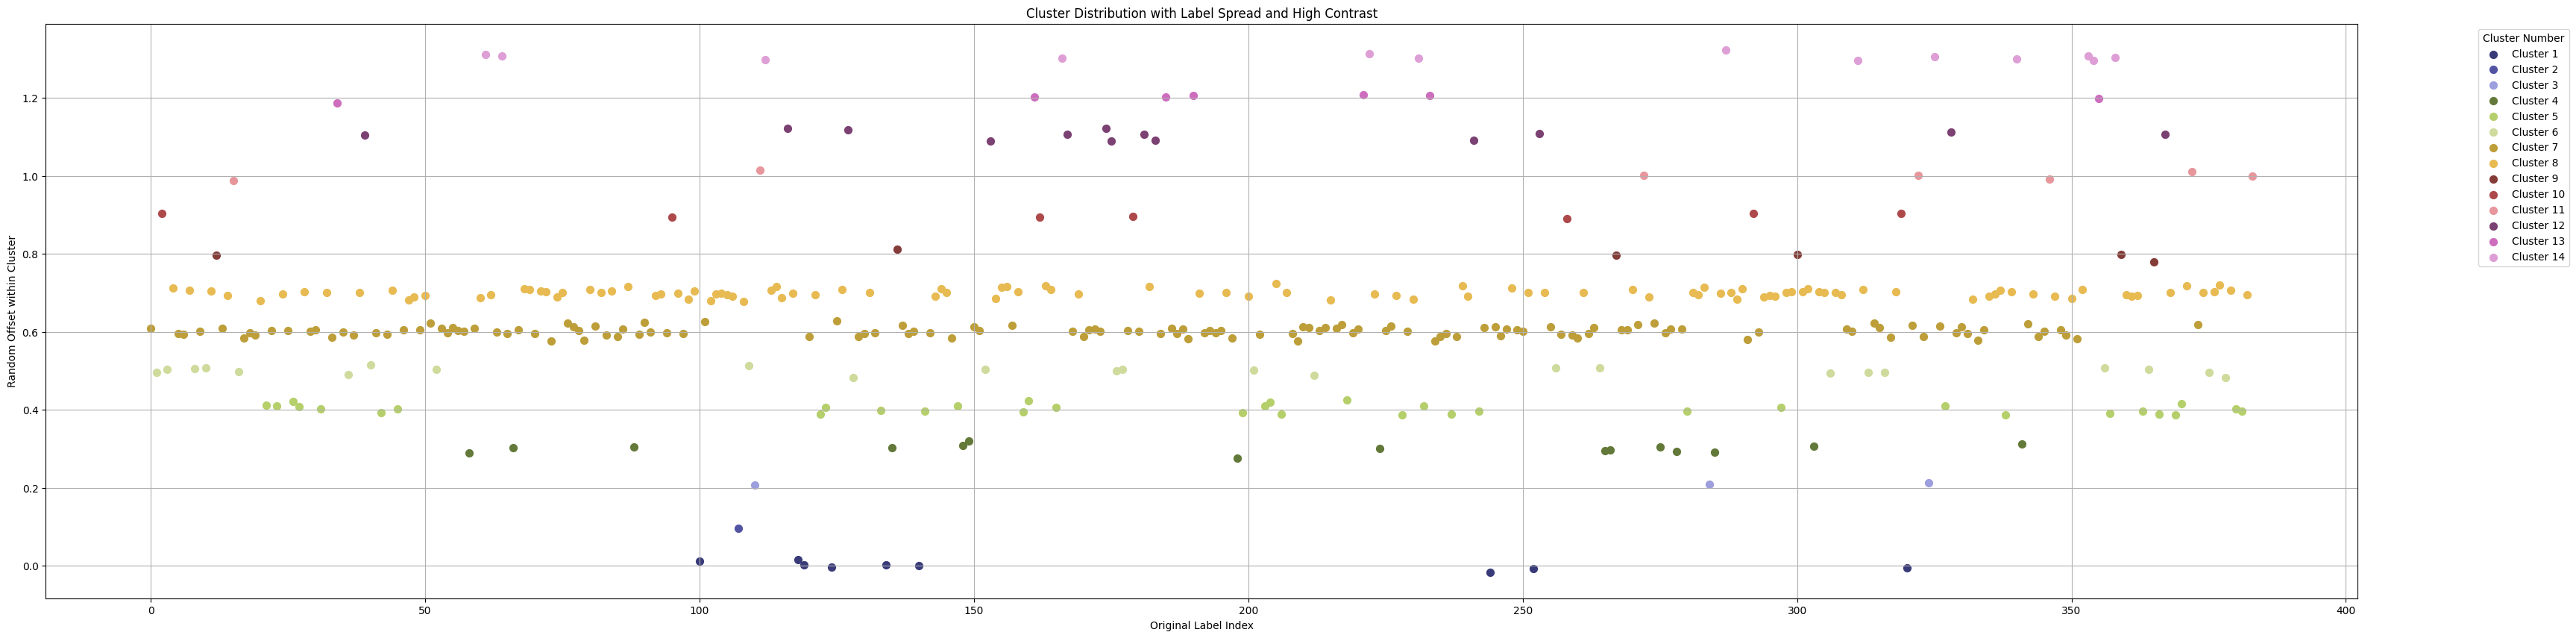

In [231]:


clusters_attn = plot_clusters(Z_attn,  np.arange(384) ,cut_method='distance', cut_value=0.6)

In [230]:
reshaped_cluster_attn = clusters_attn.reshape(24, 16, order='F')
reshaped_cluster_attn

array([[ 6,  4,  4,  6,  5,  4,  6,  4,  4,  2,  6,  4,  5,  4, 11,  6],
       [ 4,  6,  1,  2,  4,  5,  6,  6,  4,  4,  2, 11,  6,  4,  6,  5],
       [ 6,  4,  4,  4,  5,  4,  4,  2,  4,  4,  4,  8,  3,  4,  4,  4],
       [ 7,  4,  4,  4,  5,  4,  4,  2,  4,  4,  4, 13,  4,  4,  3,  4],
       [ 5,  4,  4,  4,  1,  9, 11,  4,  4,  2,  4,  2, 13,  4,  2,  4],
       [ 6,  2,  6,  2,  4,  6, 11,  6,  6,  2,  6,  2,  2,  6, 11, 13],
       [ 4,  4,  4,  4,  6,  4,  2,  2, 11,  2,  4,  5,  6,  6,  2,  4],
       [ 5,  4,  1,  4,  5,  2,  4,  2,  4,  4,  4,  6,  4,  8,  6,  2],
       [ 4,  4,  4,  6,  5,  4,  7,  7,  4,  8,  5, 11,  4,  9,  4,  5],
       [ 2,  4,  4,  2,  5,  4,  2,  7,  4,  2,  2,  5,  4,  2,  2,  4],
       [ 6,  6, 11,  5,  5,  2,  4,  4,  4,  4,  2,  4,  5, 12, 12,  4],
       [ 6,  4,  4,  4,  9,  6,  5,  8,  4,  6,  4, 11,  5,  4, 11,  5],
       [ 6,  4,  4,  5, 11,  4,  4,  4,  4,  4,  4,  4, 13, 11,  6, 10],
       [ 4,  4,  2,  2,  4,  4,  4,  2,  5,  2,  2,

In [229]:
reshaped_cluster_cross = clusters_cross.reshape(24, 16, order='F')
reshaped_cluster_cross

array([[10, 10, 10,  9,  5, 10,  4,  8, 10,  9,  9, 10,  4, 10,  4, 10],
       [ 9, 10,  9,  8, 10, 10,  4,  8, 10,  9,  8,  6,  4,  9,  4, 10],
       [10, 10, 10, 10,  5, 10, 10,  8,  8, 10, 10,  4,  4,  8, 10, 10],
       [10, 10, 10, 10,  4,  8, 10,  8,  8,  8, 10,  4, 10, 10, 10, 10],
       [10, 10, 10, 10,  5, 10, 10, 10, 10, 10, 10,  7, 10, 10,  3, 10],
       [ 9, 10,  9,  9, 10,  9,  3,  9,  9,  9,  9,  8,  9,  9,  3, 10],
       [10, 10, 10, 10,  4, 10,  8,  8,  8,  8, 10,  4, 10, 10,  8, 10],
       [ 8, 10,  8, 10,  4, 10,  8,  1,  8,  8,  8, 10, 10,  8,  8, 10],
       [10, 10, 10, 10,  4,  8,  8,  8, 10,  8, 10,  4, 10, 10, 10,  4],
       [ 8, 10, 10,  9,  4, 10,  8,  8, 10,  8,  9, 10, 10, 10,  8, 10],
       [10, 10, 10, 10,  4,  8, 10,  8,  8,  8,  9,  4, 10,  8, 10,  8],
       [10, 10, 10, 10,  4, 10,  4, 10, 10, 10, 10,  5,  4, 10,  5,  4],
       [10, 10, 10, 10,  5, 10, 10,  8,  8,  8, 10,  4,  4, 10, 10, 10],
       [ 8, 10,  8,  8,  4,  8,  8,  1,  2,  8,  2,

In [233]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, fowlkes_mallows_score



# Calculate metrics
ari = adjusted_rand_score(clusters_cross, clusters_attn)
ami = adjusted_mutual_info_score(clusters_cross, clusters_attn)
fmi = fowlkes_mallows_score(clusters_cross, clusters_attn)

print(f"Adjusted Rand Index: {ari:.2f}")
print(f"Adjusted Mutual Information: {ami:.2f}")
print(f"Fowlkes-Mallows Index: {fmi:.2f}")


Adjusted Rand Index: 0.07
Adjusted Mutual Information: 0.15
Fowlkes-Mallows Index: 0.32


In [ ]:
def plot_cluster_grid_old(clusters,cluster_colors):
    # Create an array of labels
    labels = np.arange(384)
    colors = [cluster_colors[str(label)] for label in clusters]
    # Define the number of rows and columns
    rows = 16
    cols = 24

    # Create X and Y coordinates for each label
    x = labels % cols  # Column index for each label
    y = labels // cols  # Row index for each label

    # Plotting
    plt.figure(figsize=(20, 10))
    plt.scatter(y, x, c=colors, cmap='tab10',s=100)  # Color-coded by label value
    plt.colorbar(label='Label Value')
    plt.title('Clusters Attention')
    plt.xlabel('Red Neurons Index')
    plt.ylabel('Green Neuros Index')
    plt.grid(True)
    plt.xticks(np.arange(rows))
    plt.yticks(np.arange(cols))
    plt.gca().invert_yaxis() 
    plt.show()
    

/tmp/ipykernel_29313/3071724200.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y, x, c=colors, cmap='tab10',s=100)  # Color-coded by label value


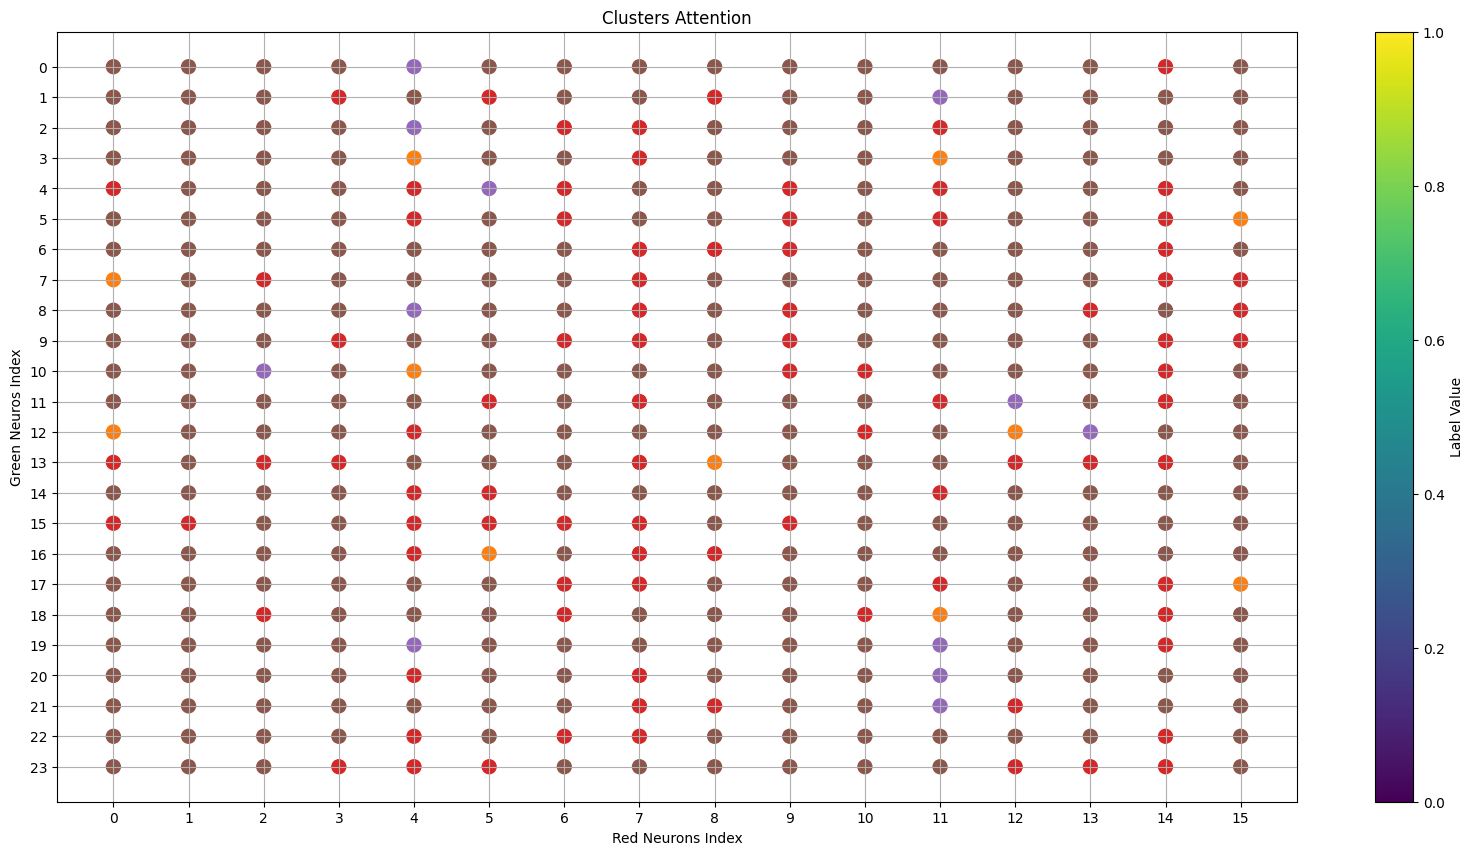

In [ ]:
plot_cluster_grid_old(clusters_attn,cluster_colors_attn)

In [ ]:
plot_cluster_grid_old(clusters_cross,cross_cluster_colors)

KeyError: '10'

In [ ]:
cluster_group_attn = create_cluster_dic(clusters_attn)
cluster_group_cross = create_cluster_dic(clusters_cross)

In [ ]:
cluster_list = list(cluster_group_attn.keys())
cluster_group_attn[1]

In [ ]:
import numpy as np
from scipy.stats import kendalltau, spearmanr

# Example data - replace these with your actual ordered_columns1 and ordered_columns2
ordered_columns1 = np.array(['item1', 'item2', 'item3', 'item4', 'item5'])
ordered_columns2 = np.array(['item2', 'item1', 'item4', 'item3', 'item5'])

# Calculate Kendall's Tau
tau, tau_p_value = kendalltau(sorted_columns_attn_ind, ordered_columns_cross)

# Calculate Spearman's Rank Correlation
spearman_corr, spearman_p_value = spearmanr(sorted_columns_attn_ind, ordered_columns_cross)

print("Kendall's Tau:", tau, "P-value:", tau_p_value)
print("Spearman's Rank Correlation:", spearman_corr, "P-value:", spearman_p_value)



NameError: name 'sorted_columns_attn_ind' is not defined

### Visu cluster

In [ ]:
plot_cross_of_cluster_attn(cluster_group_attn,2,REC_INDEPENDENT_1_HEAD_ENC9_DEC9_COMBINED_DEC)

NameError: name 'cluster_group_attn' is not defined

In [ ]:
plot_cross_of_cluster_cross(cluster_group_cross,5,REC_INDEPENDENT_1_HEAD_ENC9_DEC9_COMBINED_DEC)


# OTHER Manuell analysis

In [92]:
def plot_pair(pair):
    # Create a new figure with a specific size
    fig, ax = plt.subplots(figsize=(16, 7))

    # Plot the data
    ax.plot(pair.iloc[:, 0], color='red', label=r'$S_{I1}(t)$')   # First column in red
    ax.plot(pair.iloc[:, 1], color='green', label=r'$S_{E18}(t)$') # Second column in green

    # Set the title and labels
    ax.set_title(r'$S_{I1}(t)$ and $S_{E18}(t)$', fontsize=25)
    ax.set_xlabel('Time t', fontsize=17,fontweight='bold')
    ax.set_ylabel(r'$\mathbf{\Delta F / F}$', fontsize=17,fontweight='bold')

    # Set the x-axis limits
    ax.set_xlim(0, 1031)

    # Set the x-axis and y-axis tick labels' font size
    ax.tick_params(axis='both', labelsize=15)

    # Add a legend
    ax.legend(fontsize=20, loc='lower left')

    # Add a grid
    ax.grid(True, linestyle='--', alpha=0.7)

    # Adjust the layout and spacing
    ax.tick_params(axis='both', labelsize=14, direction='out', length=6, width=2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    fig.tight_layout(pad=2)
    plt.savefig(f"images/cross/TIME_EX_GOOD.png", dpi=500, bbox_inches='tight')
    # Display the plot
    plt.show()

In [93]:
def plot_cross_corr(lags_limited,cc_limited):
    fig, ax = plt.subplots(figsize=(16, 7))
    plt.stem(lags_limited, cc_limited)
    plt.title(r'Cross-Correlogram: $\mathbf{r_{S_{I1},S_{E18}}}$', fontweight='bold',fontsize=25)
    plt.xlabel(r'Lags $\tau$',fontsize=20,fontweight='bold')
    markerline, stemlines, baseline = ax.stem(lags_limited, cc_limited, basefmt="red", linefmt='blue', markerfmt='o', bottom=0.0)
    plt.setp(stemlines, 'linewidth', 1.5)
    plt.ylabel(r'$\mathbf{r_{S_{I1},S_{E18}}}$',fontsize=20)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', labelsize=14, direction='out', length=6, width=2)
    fig.tight_layout(pad=2)
    
    plt.savefig(f"images/cross/CROSS_EX_GOOD.png", dpi=500, bbox_inches='tight')
    plt.show()
    
        

In [95]:
def plot_exp_attn(patch_scores,pair_index):
    fig, ax = plt.subplots(figsize=(16, 7))
    final_list_order = generate_patch_list(4)
    #final_list_order = final_list_order[::-1]
    final_list_order = np.arange(-4,5)
    pair = patch_scores.iloc[:,pair_index:pair_index+1]   
    plt.stem(final_list_order, pair,basefmt="")
    markerline, stemlines, baseline = ax.stem(final_list_order, pair, basefmt="red", linefmt='blue', markerfmt='o', bottom=0.0)
    plt.setp(stemlines, 'linewidth', 1.5)
    plt.title("Attn")
    plt.xlabel('Key')
    plt.ylabel('Average Value')
    
    ax.set_title(r"Attention Estimate: $\mathbf{\bar{a}_{S_{I1},S_{E18}}}$ ", fontsize=25, fontweight='bold')
    ax.set_xlabel('Segment Aligment', fontsize=20, fontweight='bold')
    ax.set_ylabel(r'$\mathbf{\bar{a}_{S_{I1},S_{E18}}}$', fontsize=20)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', labelsize=14, direction='out', length=6, width=2)
    fig.tight_layout(pad=2)
    #plt.savefig(f"attn_dfs_test/images/expAttn/{name}.png") 
    plt.savefig(f"images/cross/ATTN_EX_GOOD.png", dpi=500, bbox_inches='tight')
    plt.show()

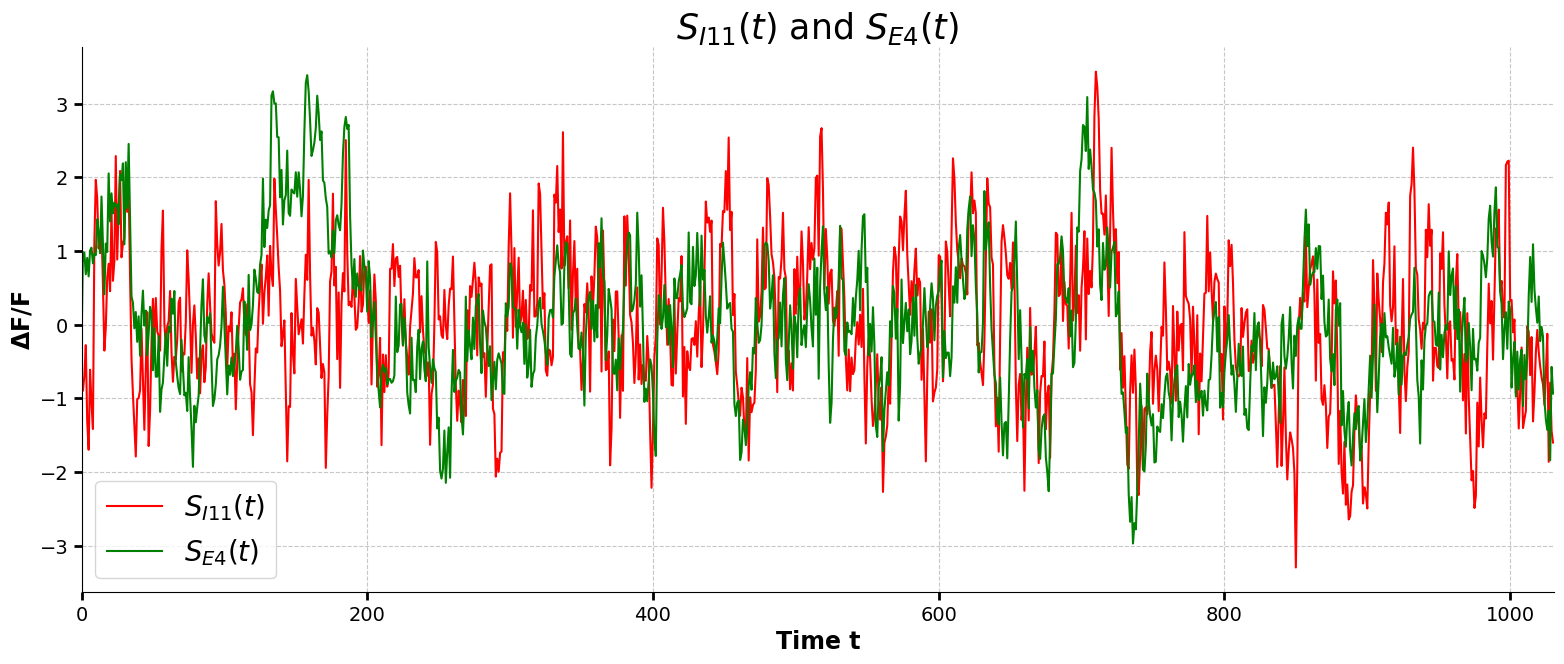

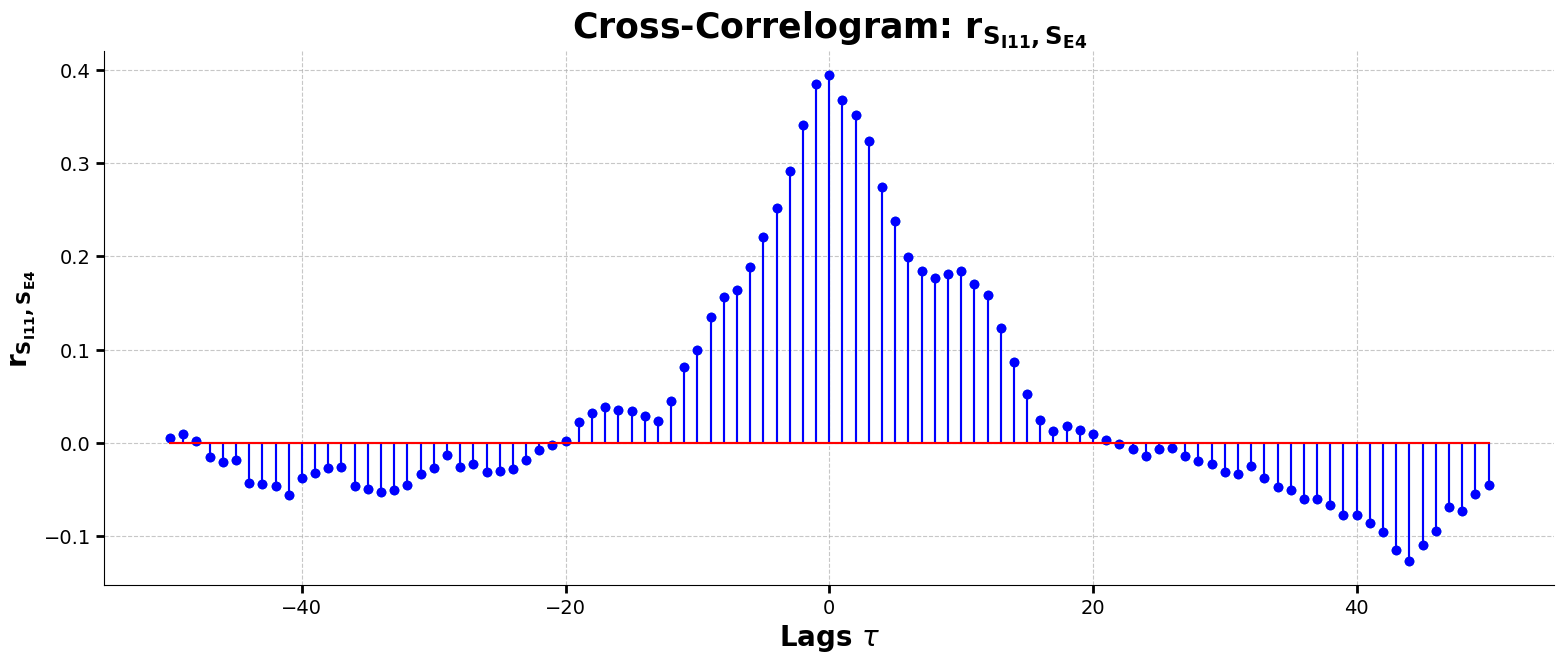

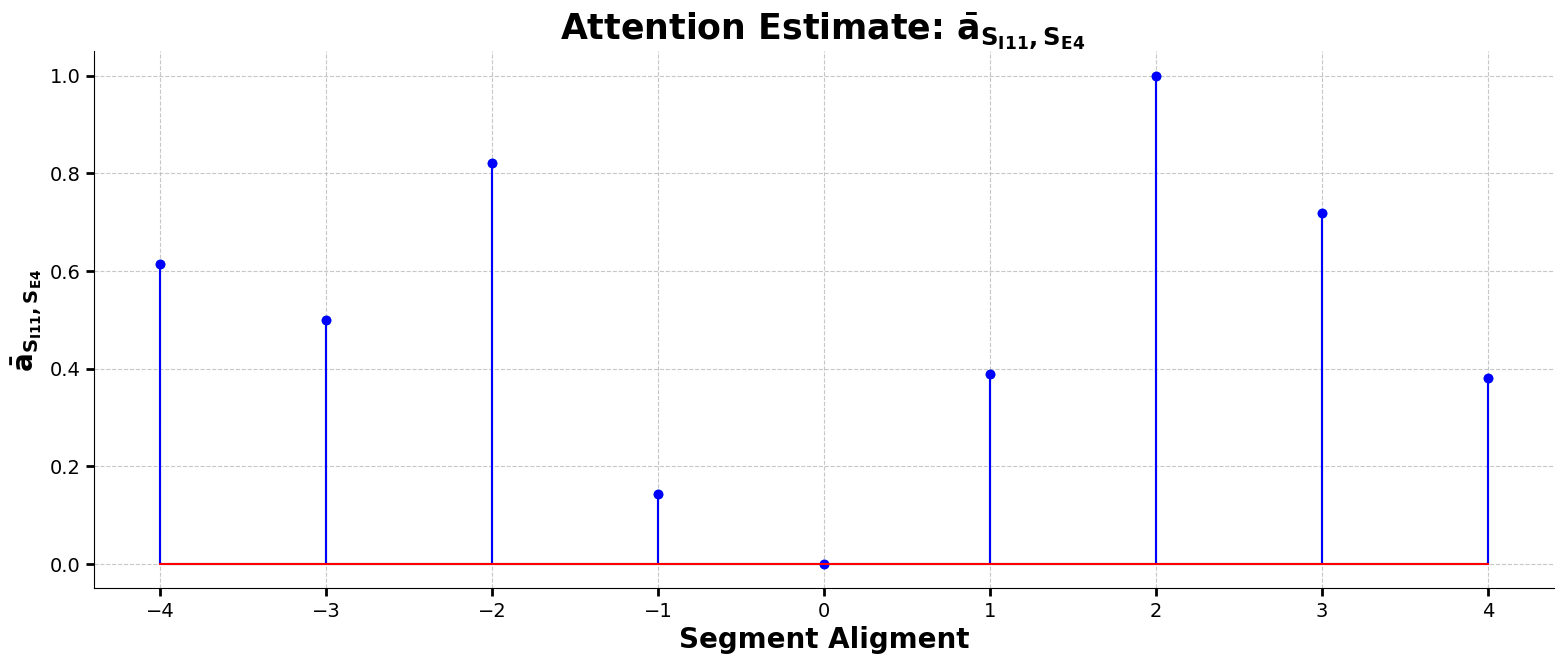

In [86]:
# S1 L,  S2 R
pair_index = 243
pair = get_column_pair(paired_df,pair_index)
plot_pair(pair)
pair.columns[0] + pair.columns[1]
l,c ,_= compute_cross_corr(pair)
c ,l= bin_and_average(c,1,l[0],l[-1])
#c = np.abs(c)
plot_cross_corr(l,c)
plot_exp_attn(REC_ACTIVE,pair_index)

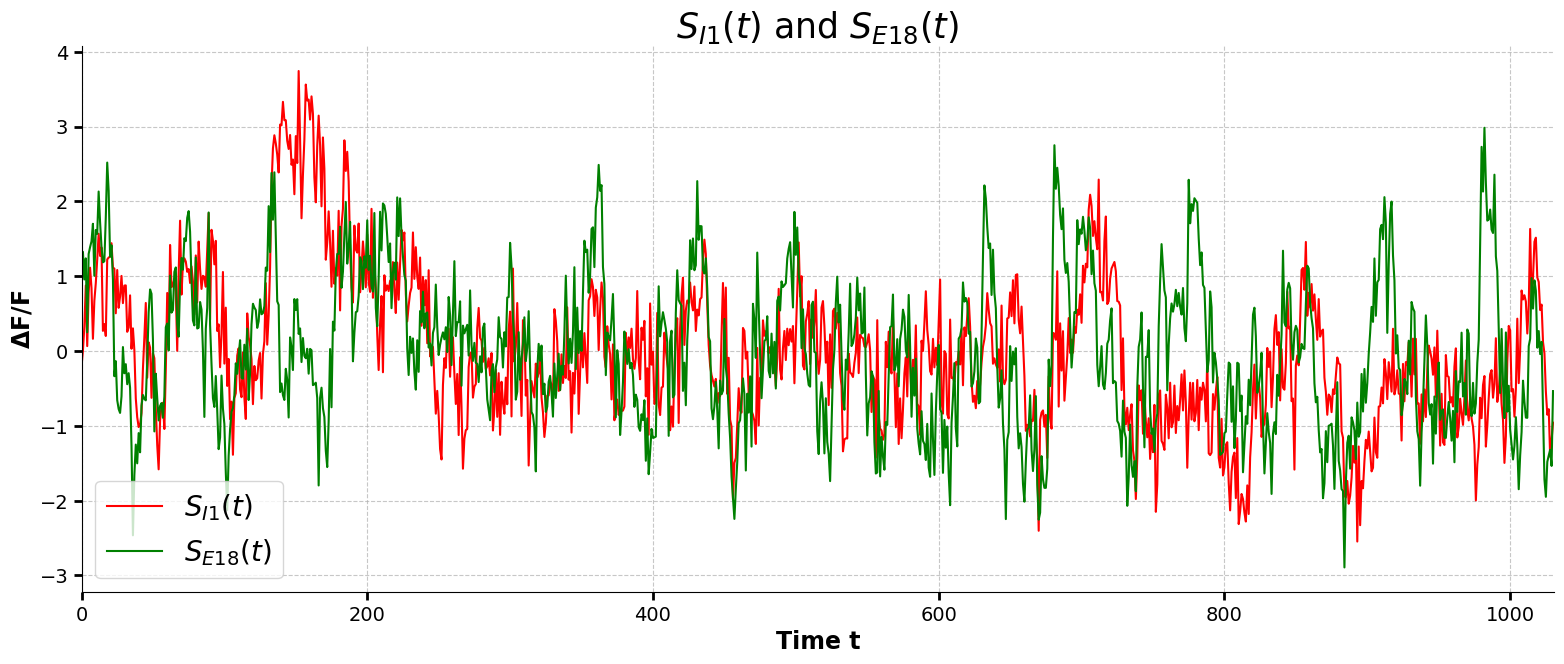

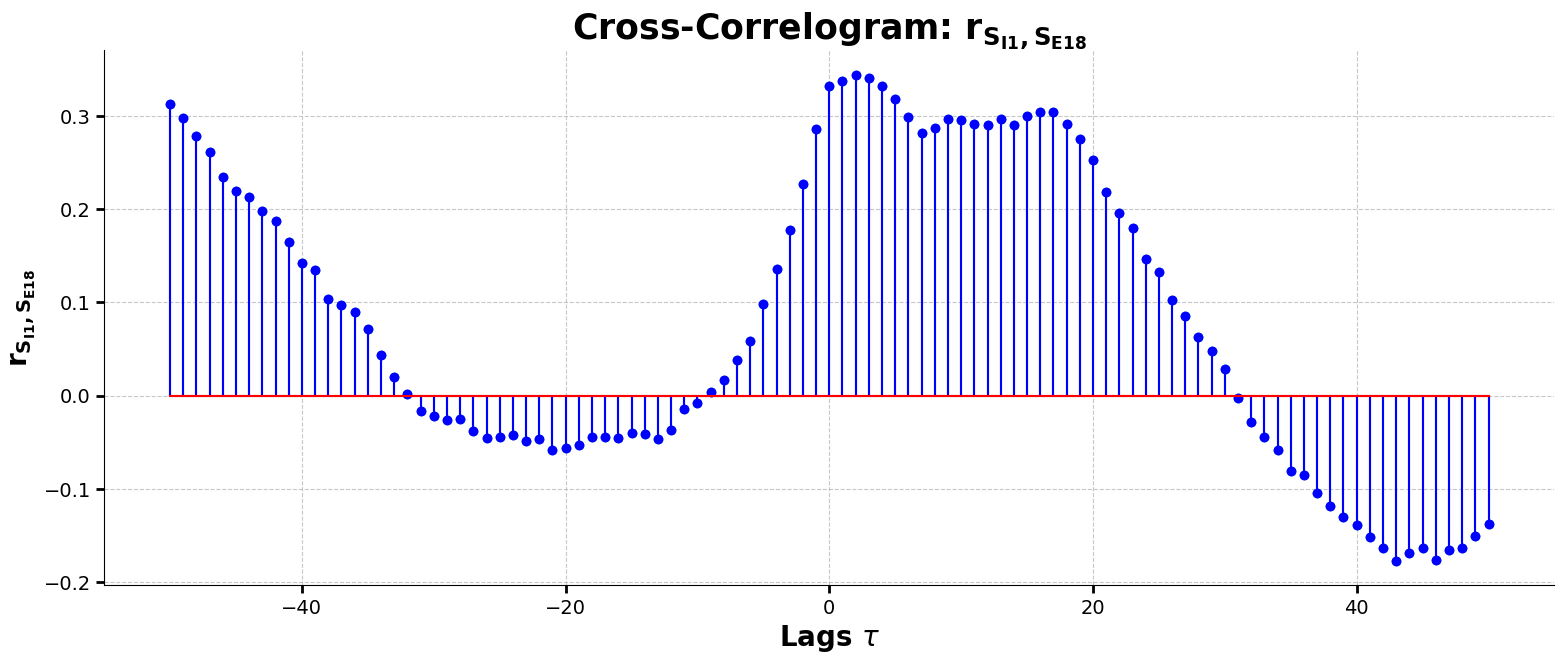

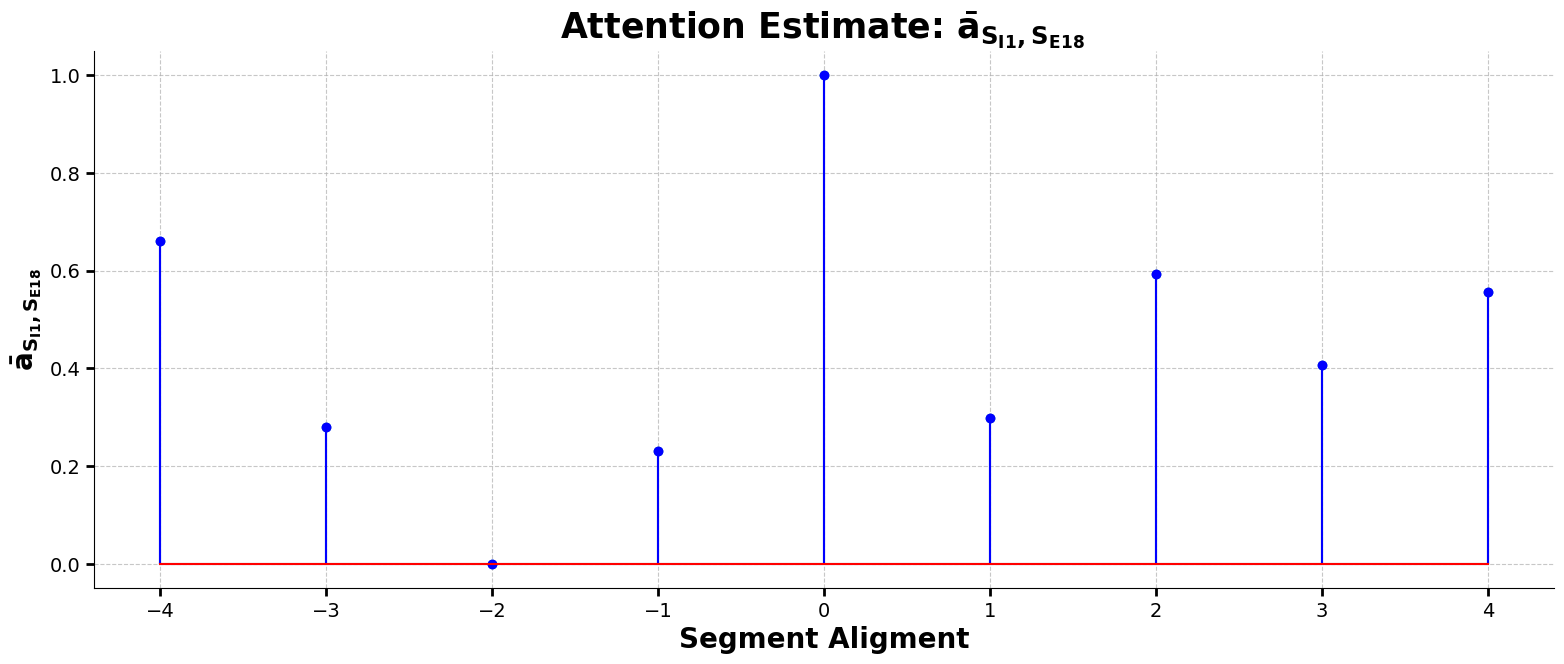

In [96]:
pair_index =  17
pair = get_column_pair(paired_df,pair_index)
plot_pair(pair)
pair.columns[0] + pair.columns[1]
l,c ,_= compute_cross_corr(pair)
c ,l= bin_and_average(c,1,l[0],l[-1])
#c = np.abs(c)
plot_cross_corr(l,c)
plot_exp_attn(REC_ACTIVE,pair_index)

In [61]:
pair

,cluster_1_red_s1_paired.17,cluster_6_green_s2_paired
0,-0.210637,0.745566
1,0.005327,1.325046
2,0.326035,0.956228
3,0.875854,1.238062
4,0.065255,0.249218
...,...,...
1026,-0.851769,-1.481733
1027,-0.778003,-1.397263
1028,-1.413795,-1.320458
1029,-1.187163,-1.536734
